In [1]:
import sys
!{sys.executable} -m pip -q install palantir fa2


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline

sc.set_figure_params()
scf.set_figure_pubready()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [14]:
adata = sc.read_h5ad(r"/mnt/g/Mandeep_dataset/NEW/data_combined_final.h5ad")

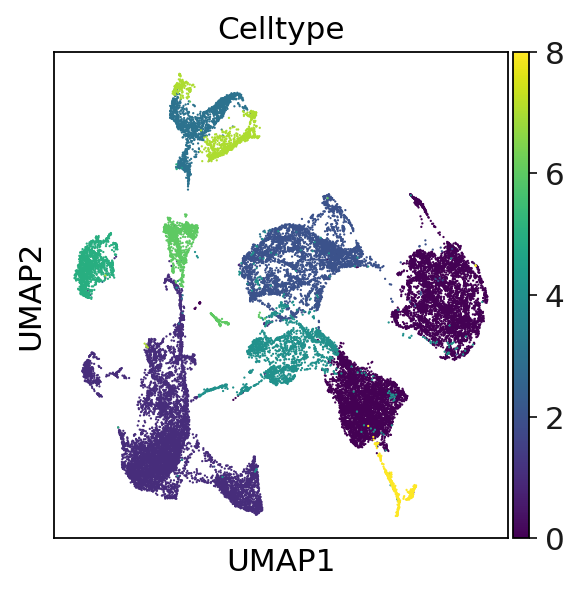

In [7]:
sc.pl.umap(adata, color = 'Celltype')

In [6]:
adata.obs

nCount_RNA  nFeature_RNA orig.ident  percent.rb  \
AAACCCAAGGTGGCTA-1_1       7692.0          3329          1   10.959438   
AAACCCAGTACGAGCA-1_1      21168.0          5773          1   17.465042   
AAACCCAGTGCGAGTA-1_1      14918.0          4401          1   20.424990   
AAACGAAGTTAGGAGC-1_1       5777.0          2950          1    8.776181   
AAACGAAGTTGTTGCA-1_1       6035.0          2878          1    9.859155   
...                           ...           ...        ...         ...   
TTTCACAGTACGAAAT-1_20       572.0           309          1    1.398601   
TTTCGATAGGCGTTAG-1_20      2165.0           778          1   34.734411   
TTTGACTAGAAGTGTT-1_20      1992.0           872          1   26.706827   
TTTGGTTGTGGATCAG-1_20      1045.0           571          1   19.904306   
TTTGTTGGTTACGATC-1_20      1760.0           818          1   23.409091   

                        S.Score  G2M.Score Phase  percent.mt RNA_snn_res.0.5  \
AAACCCAAGGTGGCTA-1_1  -0.229155  -0.104323    G1    4.667187               0   
AAACCCAGTACGAGCA-1_1  -0.335224  -0.302475    G1    4.393424               0   
AAACCCAGTGCGAGTA-1_1  -0.282473  -0.154005    G1    7.849578               3   
AAACGAAGTTAGGAGC-1_1  -0.116279  -0.170204    G1    0.917431               1   
AAACGAAGTTGTTGCA-1_1  -0.148043  -0.059550    G1    4.241922               1   
...                         ...        ...   ...         ...             ...   
TTTCACAGTACGAAAT-1_20 -0.019166  -0.030626    G1    0.000000               0   
TTTCGATAGGCGTTAG-1_20 -0.041989  -0.076102    G1    0.000000               6   
TTTGACTAGAAGTGTT-1_20 -0.061299  -0.086354    G1    0.100402               3   
TTTGGTTGTGGATCAG-1_20 -0.049605  -0.040835    G1    0.000000               3   
TTTGTTGGTTACGATC-1_20 -0.077227  -0.020082    G1    0.000000               3   

                       seurat_clusters  ...  pANN_0.25_0.25_105  \
AAACCCAAGGTGGCTA-1_1                 2  ...                 NaN   
AAACCCAGTACGAGCA-1_1                 2  ...                 NaN   
AAACCCAGTGCGAGTA-1_1                 7  ...                 NaN   
AAACGAAGTTAGGAGC-1_1                 1  ...                 NaN   
AAACGAAGTTGTTGCA-1_1                 1  ...                 NaN   
...                                ...  ...                 ...   
TTTCACAGTACGAAAT-1_20               14  ...                 NaN   
TTTCGATAGGCGTTAG-1_20                8  ...                 NaN   
TTTGACTAGAAGTGTT-1_20                8  ...                 NaN   
TTTGGTTGTGGATCAG-1_20                8  ...                 NaN   
TTTGTTGGTTACGATC-1_20                8  ...                 NaN   

                      DF.classifications_0.25_0.25_105  \
AAACCCAAGGTGGCTA-1_1                                NA   
AAACCCAGTACGAGCA-1_1                                NA   
AAACCCAGTGCGAGTA-1_1                                NA   
AAACGAAGTTAGGAGC-1_1                                NA   
AAACGAAGTTGTTGCA-1_1                                NA   
...                                                ...   
TTTCACAGTACGAAAT-1_20                               NA   
TTTCGATAGGCGTTAG-1_20                               NA   
TTTGACTAGAAGTGTT-1_20                               NA   
TTTGGTTGTGGATCAG-1_20                               NA   
TTTGTTGGTTACGATC-1_20                               NA   

                      DF.classifications_0.25_0.25_91 pANN_0.25_0.22_104  \
AAACCCAAGGTGGCTA-1_1                               NA                NaN   
AAACCCAGTACGAGCA-1_1                               NA                NaN   
AAACCCAGTGCGAGTA-1_1                               NA                NaN   
AAACGAAGTTAGGAGC-1_1                               NA                NaN   
AAACGAAGTTGTTGCA-1_1                               NA                NaN   
...                                               ...                ...   
TTTCACAGTACGAAAT-1_20                              NA                NaN   
TTTCGATAGGCGTTAG-1_20                              NA          

In [23]:
old_to_new = {
0:'MG',
1:'Rod',
2:'Progenitors',
3:'Immature cone',
4:'PR precursor',
5:'Cone',
6:'RGC ?',
7:'Stress',
8:'Glia'}
adata.obs['EK_anno'] = (
adata.obs['Celltype']
.map(old_to_new).astype('category')
)

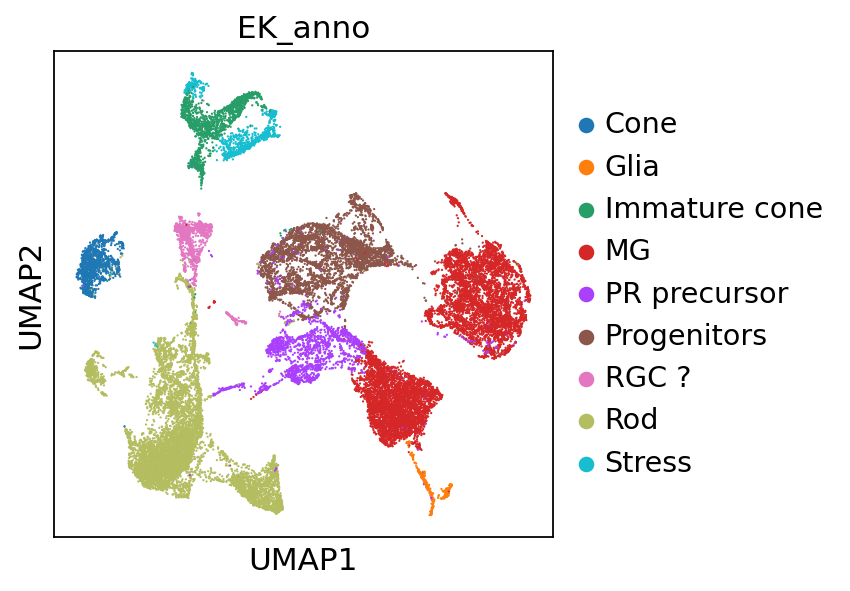

In [24]:
sc.pl.umap(adata, color = 'EK_anno')

In [13]:
adata.obs

nCount_RNA  nFeature_RNA orig.ident  percent.rb  \
AAACCCAAGGTGGCTA-1_1       7692.0          3329          1   10.959438   
AAACCCAGTACGAGCA-1_1      21168.0          5773          1   17.465042   
AAACCCAGTGCGAGTA-1_1      14918.0          4401          1   20.424990   
AAACGAAGTTAGGAGC-1_1       5777.0          2950          1    8.776181   
AAACGAAGTTGTTGCA-1_1       6035.0          2878          1    9.859155   
...                           ...           ...        ...         ...   
TTTCACAGTACGAAAT-1_20       572.0           309          1    1.398601   
TTTCGATAGGCGTTAG-1_20      2165.0           778          1   34.734411   
TTTGACTAGAAGTGTT-1_20      1992.0           872          1   26.706827   
TTTGGTTGTGGATCAG-1_20      1045.0           571          1   19.904306   
TTTGTTGGTTACGATC-1_20      1760.0           818          1   23.409091   

                        S.Score  G2M.Score Phase  percent.mt RNA_snn_res.0.5  \
AAACCCAAGGTGGCTA-1_1  -0.229155  -0.104323    G1    4.667187               0   
AAACCCAGTACGAGCA-1_1  -0.335224  -0.302475    G1    4.393424               0   
AAACCCAGTGCGAGTA-1_1  -0.282473  -0.154005    G1    7.849578               3   
AAACGAAGTTAGGAGC-1_1  -0.116279  -0.170204    G1    0.917431               1   
AAACGAAGTTGTTGCA-1_1  -0.148043  -0.059550    G1    4.241922               1   
...                         ...        ...   ...         ...             ...   
TTTCACAGTACGAAAT-1_20 -0.019166  -0.030626    G1    0.000000               0   
TTTCGATAGGCGTTAG-1_20 -0.041989  -0.076102    G1    0.000000               6   
TTTGACTAGAAGTGTT-1_20 -0.061299  -0.086354    G1    0.100402               3   
TTTGGTTGTGGATCAG-1_20 -0.049605  -0.040835    G1    0.000000               3   
TTTGTTGGTTACGATC-1_20 -0.077227  -0.020082    G1    0.000000               3   

                       seurat_clusters  ...  DF.classifications_0.25_0.25_105  \
AAACCCAAGGTGGCTA-1_1                 2  ...                                NA   
AAACCCAGTACGAGCA-1_1                 2  ...                                NA   
AAACCCAGTGCGAGTA-1_1                 7  ...                                NA   
AAACGAAGTTAGGAGC-1_1                 1  ...                                NA   
AAACGAAGTTGTTGCA-1_1                 1  ...                                NA   
...                                ...  ...                               ...   
TTTCACAGTACGAAAT-1_20               14  ...                                NA   
TTTCGATAGGCGTTAG-1_20                8  ...                                NA   
TTTGACTAGAAGTGTT-1_20                8  ...                                NA   
TTTGGTTGTGGATCAG-1_20                8  ...                                NA   
TTTGTTGGTTACGATC-1_20                8  ...                                NA   

                      DF.classifications_0.25_0.25_91 pANN_0.25_0.22_104  \
AAACCCAAGGTGGCTA-1_1                               NA                NaN   
AAACCCAGTACGAGCA-1_1                               NA                NaN   
AAACCCAGTGCGAGTA-1_1                               NA                NaN   
AAACGAAGTTAGGAGC-1_1                               NA                NaN   
AAACGAAGTTGTTGCA-1_1                               NA                NaN   
...                                               ...                ...   
TTTCACAGTACGAAAT-1_20                              NA                NaN   
TTTCGATAGGCGTTAG-1_20                              NA                NaN   
TTTGACTAGAAGTGTT-1_20                              NA                NaN   
TTTGGTTGTGGATCAG-1_20                              NA                NaN   
TTTGTTGGTTACGATC-1_20                              NA                NaN   

                      DF.classifications_0.25_0.22_104 pANN_0.25_0.29_106  \
AAACCCAAGGTGGCTA-1_1                                NA                NaN   
AAACCCAGTACGAGCA-1_1                                NA                NaN   
AAACCCAGTGCGAGTA-1_1                                NA  

computing PCA
    with n_comps=50
    finished (0:01:37)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:45)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:06:21)


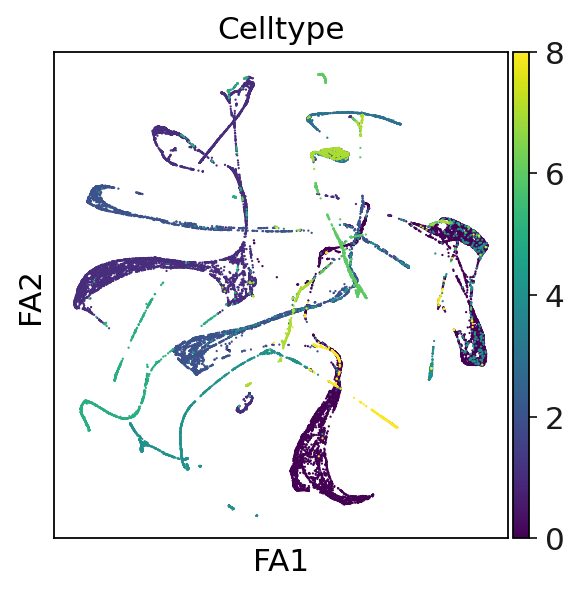

In [18]:
sc.pp.pca(adata)
pca_projections = pd.DataFrame(adata.obsm["X_pca"],index=adata.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=10)
adata.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata,n_neighbors=30,use_rep="X_palantir")
adata.obsm["X_pca2d"]=adata.obsm["X_pca"][:,:3]
sc.tl.draw_graph(adata, layout = 'fa',init_pos='X_pca2d')
sc.pl.draw_graph(adata,color=['Celltype'], layout = 'fa')

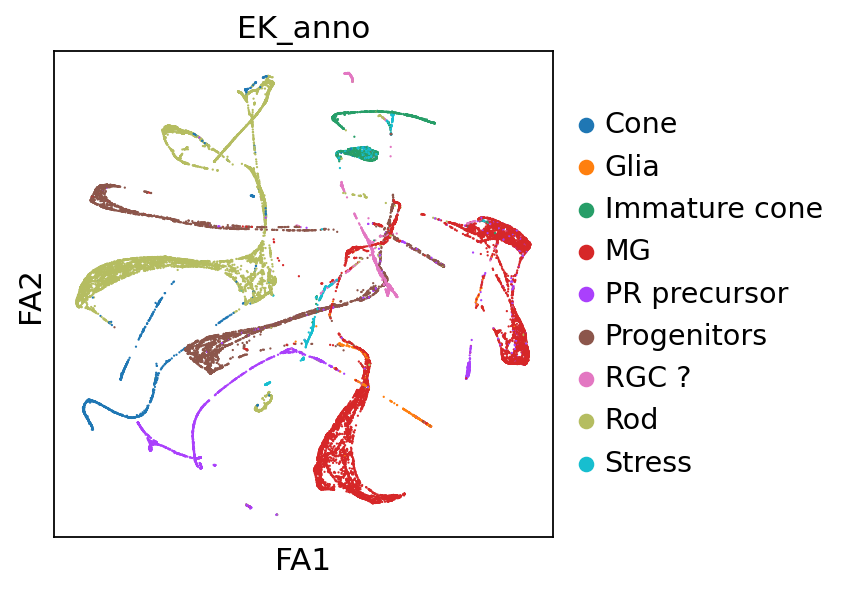

In [25]:
sc.pl.draw_graph(adata,color=['EK_anno'], layout = 'fa')

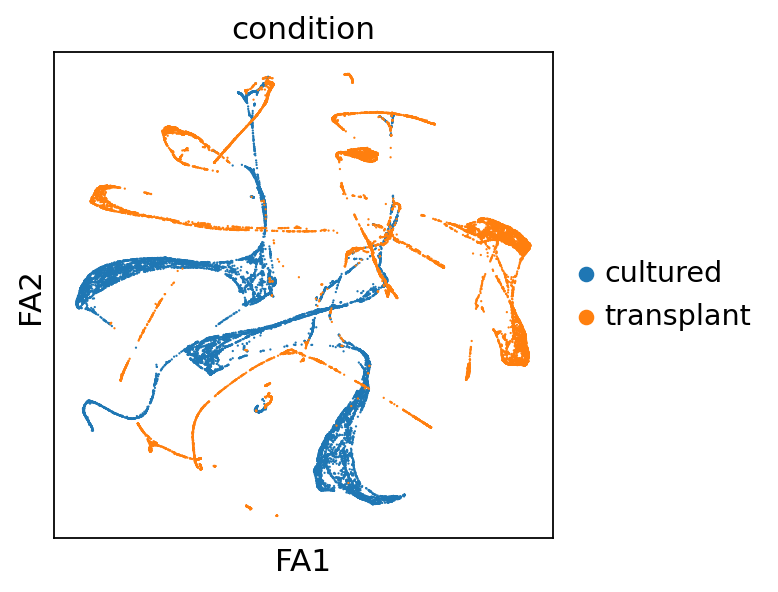

In [26]:
sc.pl.draw_graph(adata,color=['condition'], layout = 'fa')

In [22]:
sc.pl.umap(adata,color=['condition'])

In [27]:
def cluster_small_multiples(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]

    sc.pl.draw_graph(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=adata.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

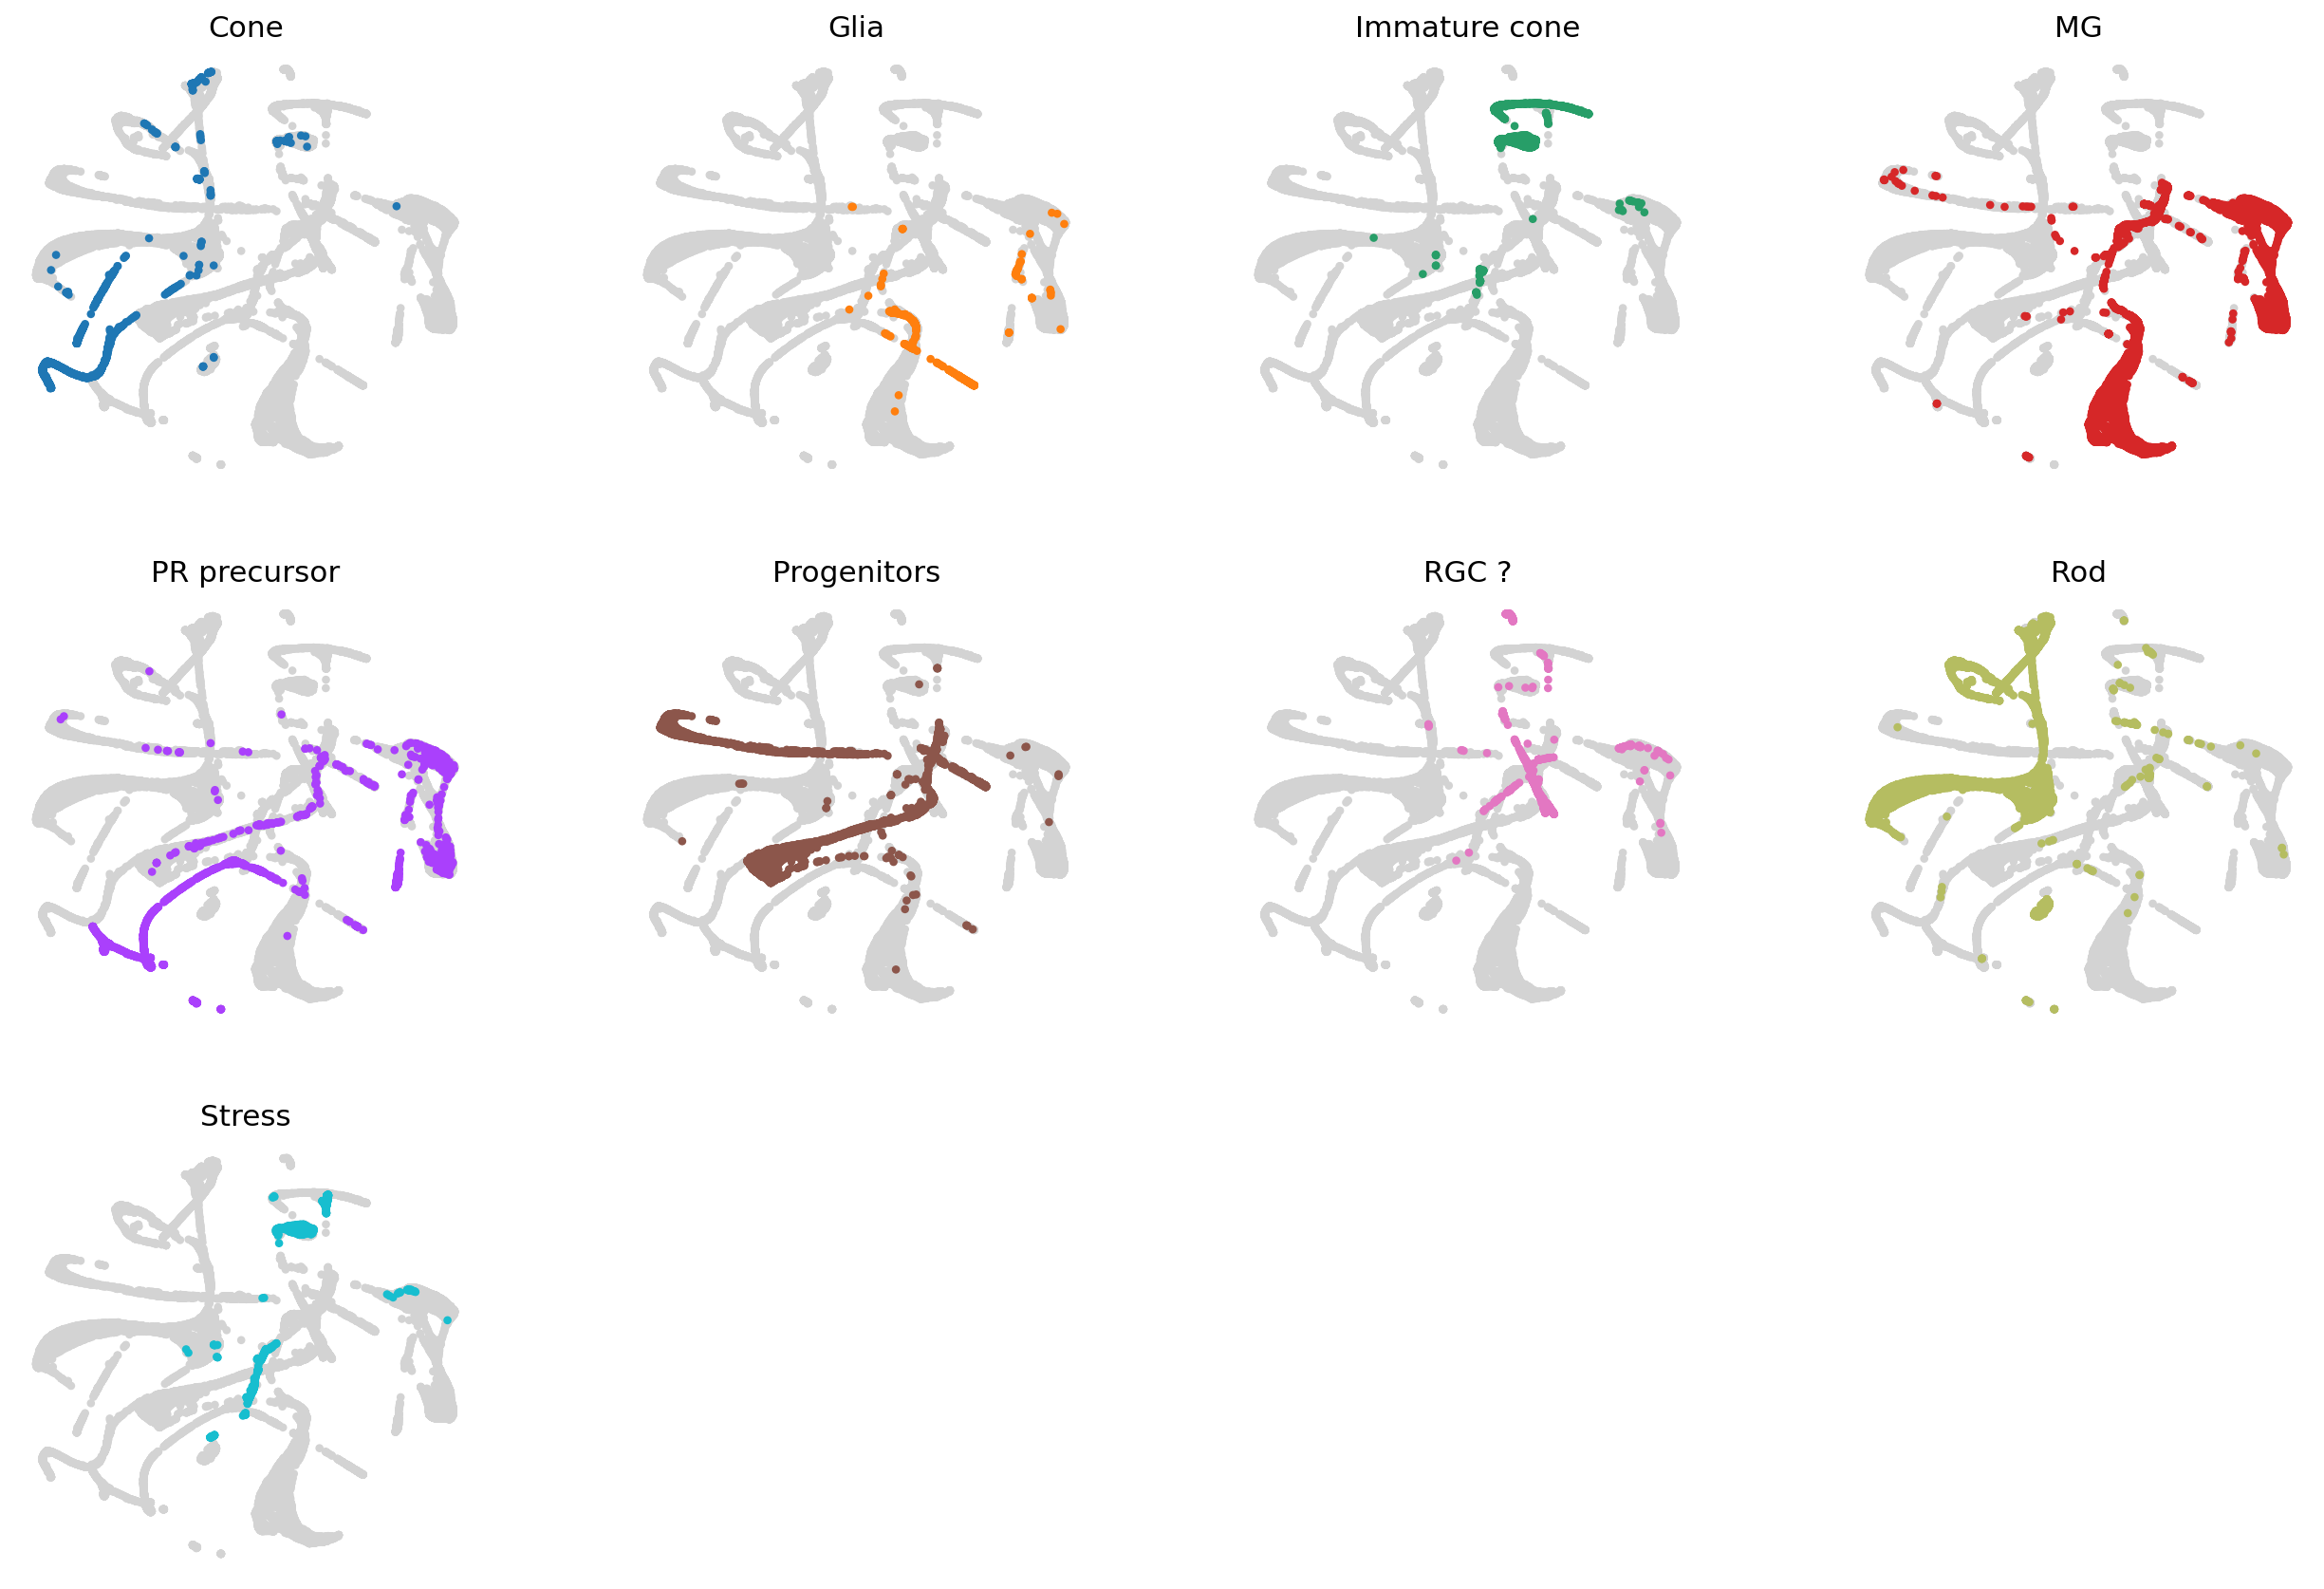

In [28]:
cluster_small_multiples(adata, clust_key = 'EK_anno', layout = 'fa')

In [29]:
def cluster_small_multiples_umap(
    adata, clust_key, size=60, frameon=False, legend_loc=None, **kwargs
):
    tmp = adata.copy()

    for i, clust in enumerate(adata.obs[clust_key].cat.categories):
        tmp.obs[clust] = adata.obs[clust_key].isin([clust]).astype("category")
        tmp.uns[clust + "_colors"] = ["#d3d3d3", adata.uns[clust_key + "_colors"][i]]

    sc.pl.umap(
        tmp,
        groups=tmp.obs[clust].cat.categories[1:].values,
        color=adata.obs[clust_key].cat.categories.tolist(),
        size=size,
        frameon=frameon,
        legend_loc=legend_loc,
        **kwargs,
    )

In [30]:
cluster_small_multiples_umap(adata, clust_key = 'EK_anno')

In [32]:
import scvelo as scv

In [33]:
loom1 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep2_2/tr_5/velocyto/tr_5.loom", cache = True)
loom2 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep1_2/tr_5/velocyto/tr_5.loom", cache = True)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [34]:
loom3 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep1_4/tr_20/velocyto/tr_20.loom", cache = True)
loom4 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep1_3/tr_17/velocyto/tr_17.loom", cache = True)
loom5 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep2_4/tr_20/velocyto/tr_20.loom", cache = True)
loom6 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep2_3/tr_17/velocyto/tr_17.loom", cache = True)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [35]:
loom7 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep2_2/tr_17/velocyto/tr_17.loom", cache = True)
loom8 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep1_4/tr_15/velocyto/tr_15.loom", cache = True)
loom9 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep1_3/tr_14/velocyto/tr_14.loom", cache = True)
loom10 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep1_2/tr_13/velocyto/tr_13.loom", cache = True)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [36]:
loom11 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep1_1/tr_12/velocyto/tr_12.loom", cache = True)
loom12 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep2_4/tr_12/velocyto/tr_12.loom", cache = True)
loom13 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep2_3/tr_11/velocyto/tr_11.loom", cache = True)
loom14 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep3_3/tr_7/velocyto/tr_7.loom", cache = True)

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [37]:
loom15 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep3_2/tr_6/velocyto/tr_6.loom", cache = True)
loom16 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep3_1/tr_5/velocyto/tr_5.loom", cache = True)
loom17 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep1_1/tr_1/velocyto/tr_1.loom", cache = True)
loom18 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep2_1/tr_4/velocyto/tr_4.loom", cache = True)
loom19 = scv.read("/mnt/g/Mandeep_dataset/NEW/cultured_rep2_1/tr_3/velocyto/tr_3.loom", cache = True)
loom20 = scv.read("/mnt/g/Mandeep_dataset/NEW/transplant_rep3_4/tr_8/velocyto/tr_8.loom", cache = True)


... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [105]:
adata_1 = scv.utils.merge(adata, loom1)
adata_2 = scv.utils.merge(adata, loom2)
adata_3 = scv.utils.merge(adata, loom3)
adata_4 = scv.utils.merge(adata, loom4)
adata_5 = scv.utils.merge(adata, loom5)
adata_6 = scv.utils.merge(adata, loom6)
adata_7 = scv.utils.merge(adata, loom7)
adata_8 = scv.utils.merge(adata, loom8)
adata_9 = scv.utils.merge(adata, loom9)
adata_10 = scv.utils.merge(adata, loom10)
adata_11 = scv.utils.merge(adata, loom11)
adata_12 = scv.utils.merge(adata, loom12)
adata_13 = scv.utils.merge(adata, loom13)
adata_14 = scv.utils.merge(adata, loom14)
adata_15 = scv.utils.merge(adata, loom15)
adata_16 = scv.utils.merge(adata, loom16)
adata_17 = scv.utils.merge(adata, loom17)
adata_18 = scv.utils.merge(adata, loom18)
adata_19 = scv.utils.merge(adata, loom19)
adata_20 = scv.utils.merge(adata, loom20)

In [106]:
adata_velo = adata_1.concatenate([adata_2, adata_3, adata_4, adata_5, adata_6,adata_7,adata_8,adata_9,adata_10,
                                 adata_11,adata_12,adata_13,adata_14,adata_15,adata_16,
                                adata_17,adata_18,adata_19,adata_20])

In [42]:
adata

AnnData object with n_obs × n_vars = 29282 × 36601
    obs: 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'pANN_0.25_0.03_224', 'DF.classifications_0.25_0.03_224', 'DF.classifications_0.25_0.03_181', 'condition', 'group', 'DF.classifications_0.25_0.03_186', 'pANN_0.25_0.04_224', 'DF.classifications_0.25_0.04_224', 'DF.classifications_0.25_0.04_183', 'pANN_0.25_0.3_223', 'DF.classifications_0.25_0.3_223', 'DF.classifications_0.25_0.3_185', 'pANN_0.25_0.01_187', 'DF.classifications_0.25_0.01_187', 'DF.classifications_0.25_0.01_156', 'pANN_0.25_0.07_188', 'DF.classifications_0.25_0.07_188', 'DF.classifications_0.25_0.07_156', 'pANN_0.25_0.01_186', 'DF.classifications_0.25_0.01_186', 'DF.classifications_0.25_0.01_155', 'DF.classifications_0.25_0.01_154', 'pANN_0.25_0.07_119', 'DF.classifications_0.25_0.07_119', 'DF.classifications_0.25_0.07_103', 'pANN_0.25_0.28_126', 'DF.classifications_0.25_0

In [43]:
adata_velo

AnnData object with n_obs × n_vars = 32059 × 36591
    obs: 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'percent.rb', 'S.Score', 'G2M.Score', 'Phase', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'pANN_0.25_0.03_224', 'DF.classifications_0.25_0.03_224', 'DF.classifications_0.25_0.03_181', 'condition', 'group', 'DF.classifications_0.25_0.03_186', 'pANN_0.25_0.04_224', 'DF.classifications_0.25_0.04_224', 'DF.classifications_0.25_0.04_183', 'pANN_0.25_0.3_223', 'DF.classifications_0.25_0.3_223', 'DF.classifications_0.25_0.3_185', 'pANN_0.25_0.01_187', 'DF.classifications_0.25_0.01_187', 'DF.classifications_0.25_0.01_156', 'pANN_0.25_0.07_188', 'DF.classifications_0.25_0.07_188', 'DF.classifications_0.25_0.07_156', 'pANN_0.25_0.01_186', 'DF.classifications_0.25_0.01_186', 'DF.classifications_0.25_0.01_155', 'DF.classifications_0.25_0.01_154', 'pANN_0.25_0.07_119', 'DF.classifications_0.25_0.07_119', 'DF.classifications_0.25_0.07_103', 'pANN_0.25_0.28_126', 'DF.classifications_0.25_0

In [44]:
adata_cult = adata_velo[adata_velo.obs['condition'].isin(['cultured'])]
adata_tran = adata_velo[adata_velo.obs['condition'].isin(['transplant'])]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


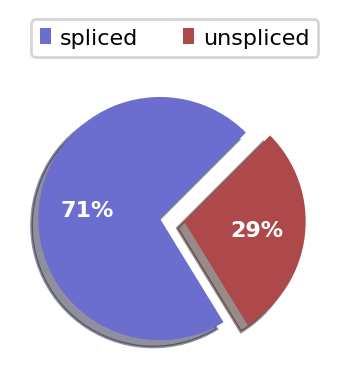

In [45]:
scv.pl.proportions(adata_cult)

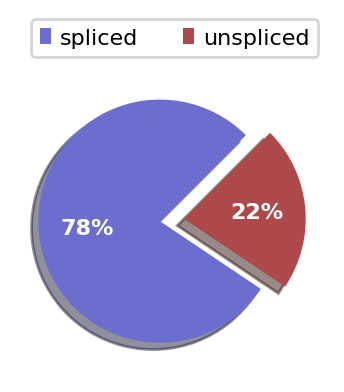

In [46]:
scv.pl.proportions(adata_tran)

In [47]:
scv.pp.filter_and_normalize(adata_cult, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_cult, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(adata_tran, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_tran, n_pcs=30, n_neighbors=30)

Filtered out 25053 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 26629 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [49]:
scv.pp.remove_duplicate_cells(adata_cult)
scv.pp.remove_duplicate_cells(adata_tran)

Removed 31 duplicate cells.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Removed 75 duplicate cells.
computing neighbors
    finished (0:00:04) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [50]:
scv.tl.velocity(adata_cult)
scv.tl.velocity(adata_tran)

computing velocities
    finished (0:00:17) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:13) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [51]:
scv.tl.velocity_graph(adata_cult)
scv.tl.velocity_graph(adata_tran)

computing velocity graph (using 1/12 cores)


  0%|          | 0/16130 [00:00<?, ?cells/s]

    finished (0:00:52) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/12 cores)


  0%|          | 0/15823 [00:00<?, ?cells/s]

    finished (0:00:51) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_mandeep_cultured+velocity.svg


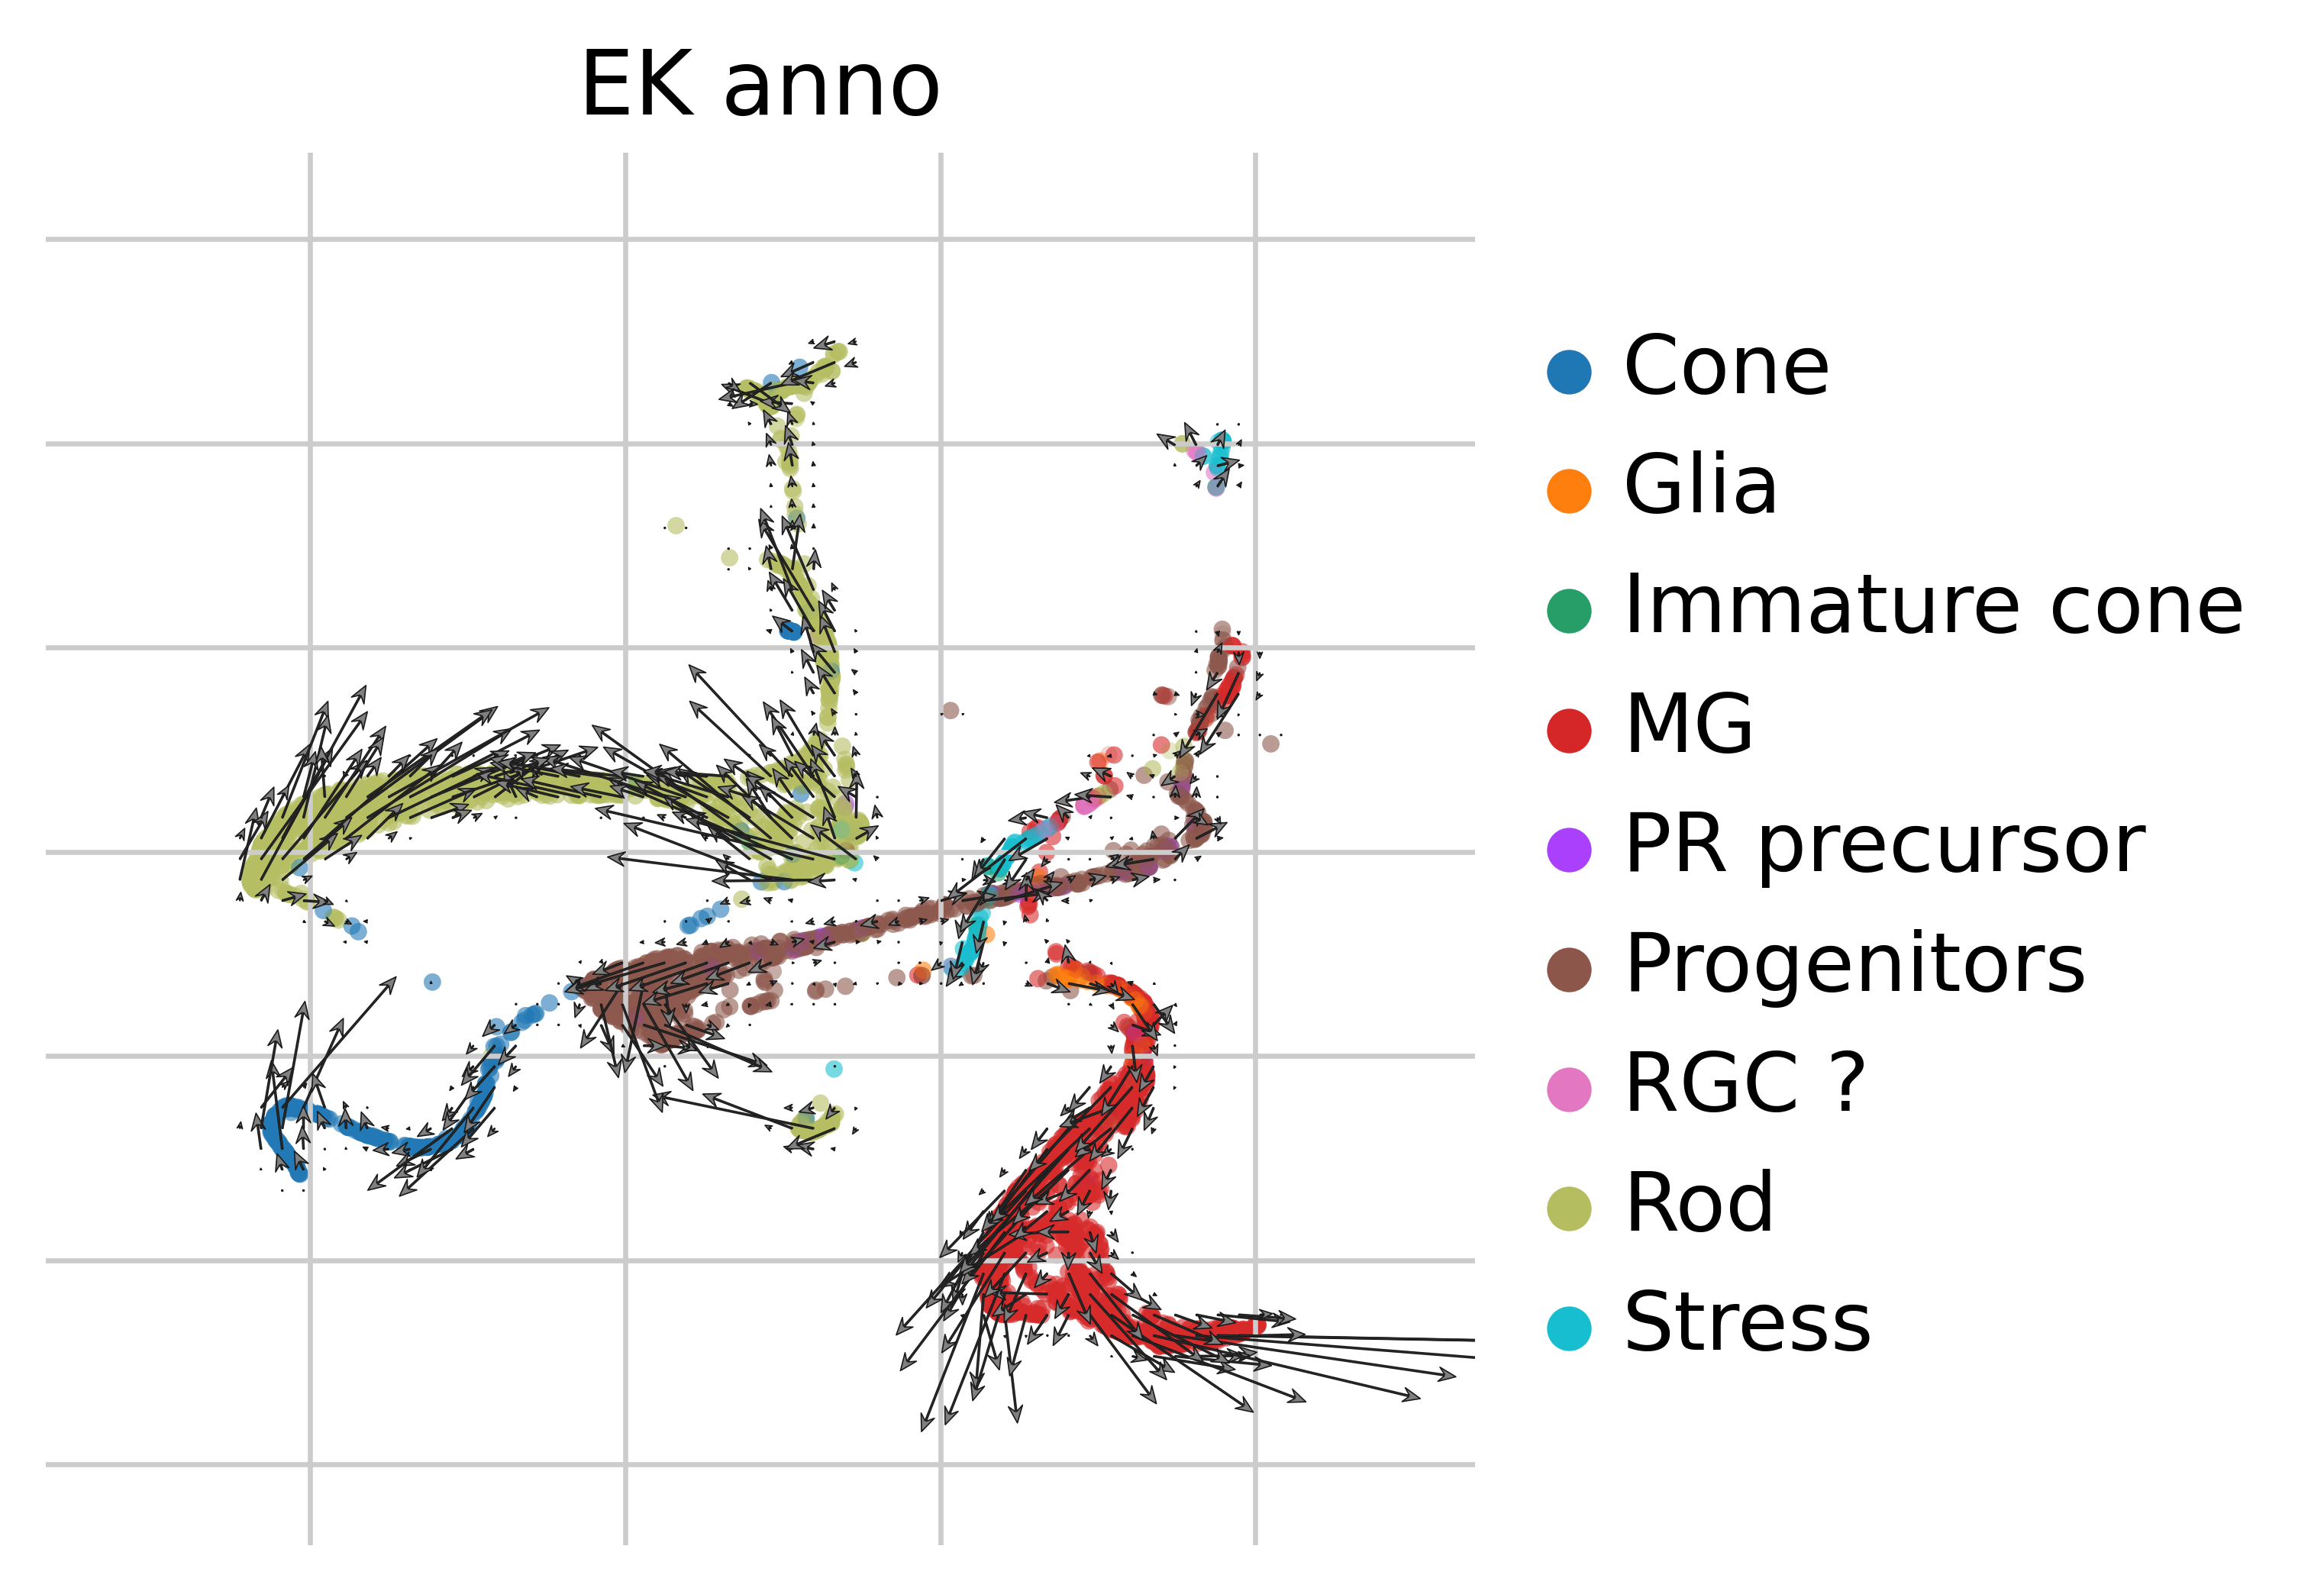

In [191]:
scv.pl.velocity_embedding_grid(adata_cult, basis='draw_graph_fa', color = 'EK_anno', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 8, arrow_size = 2, density = 1, legend_loc= 'right', save = 'mandeep_cultured+velocity.svg')

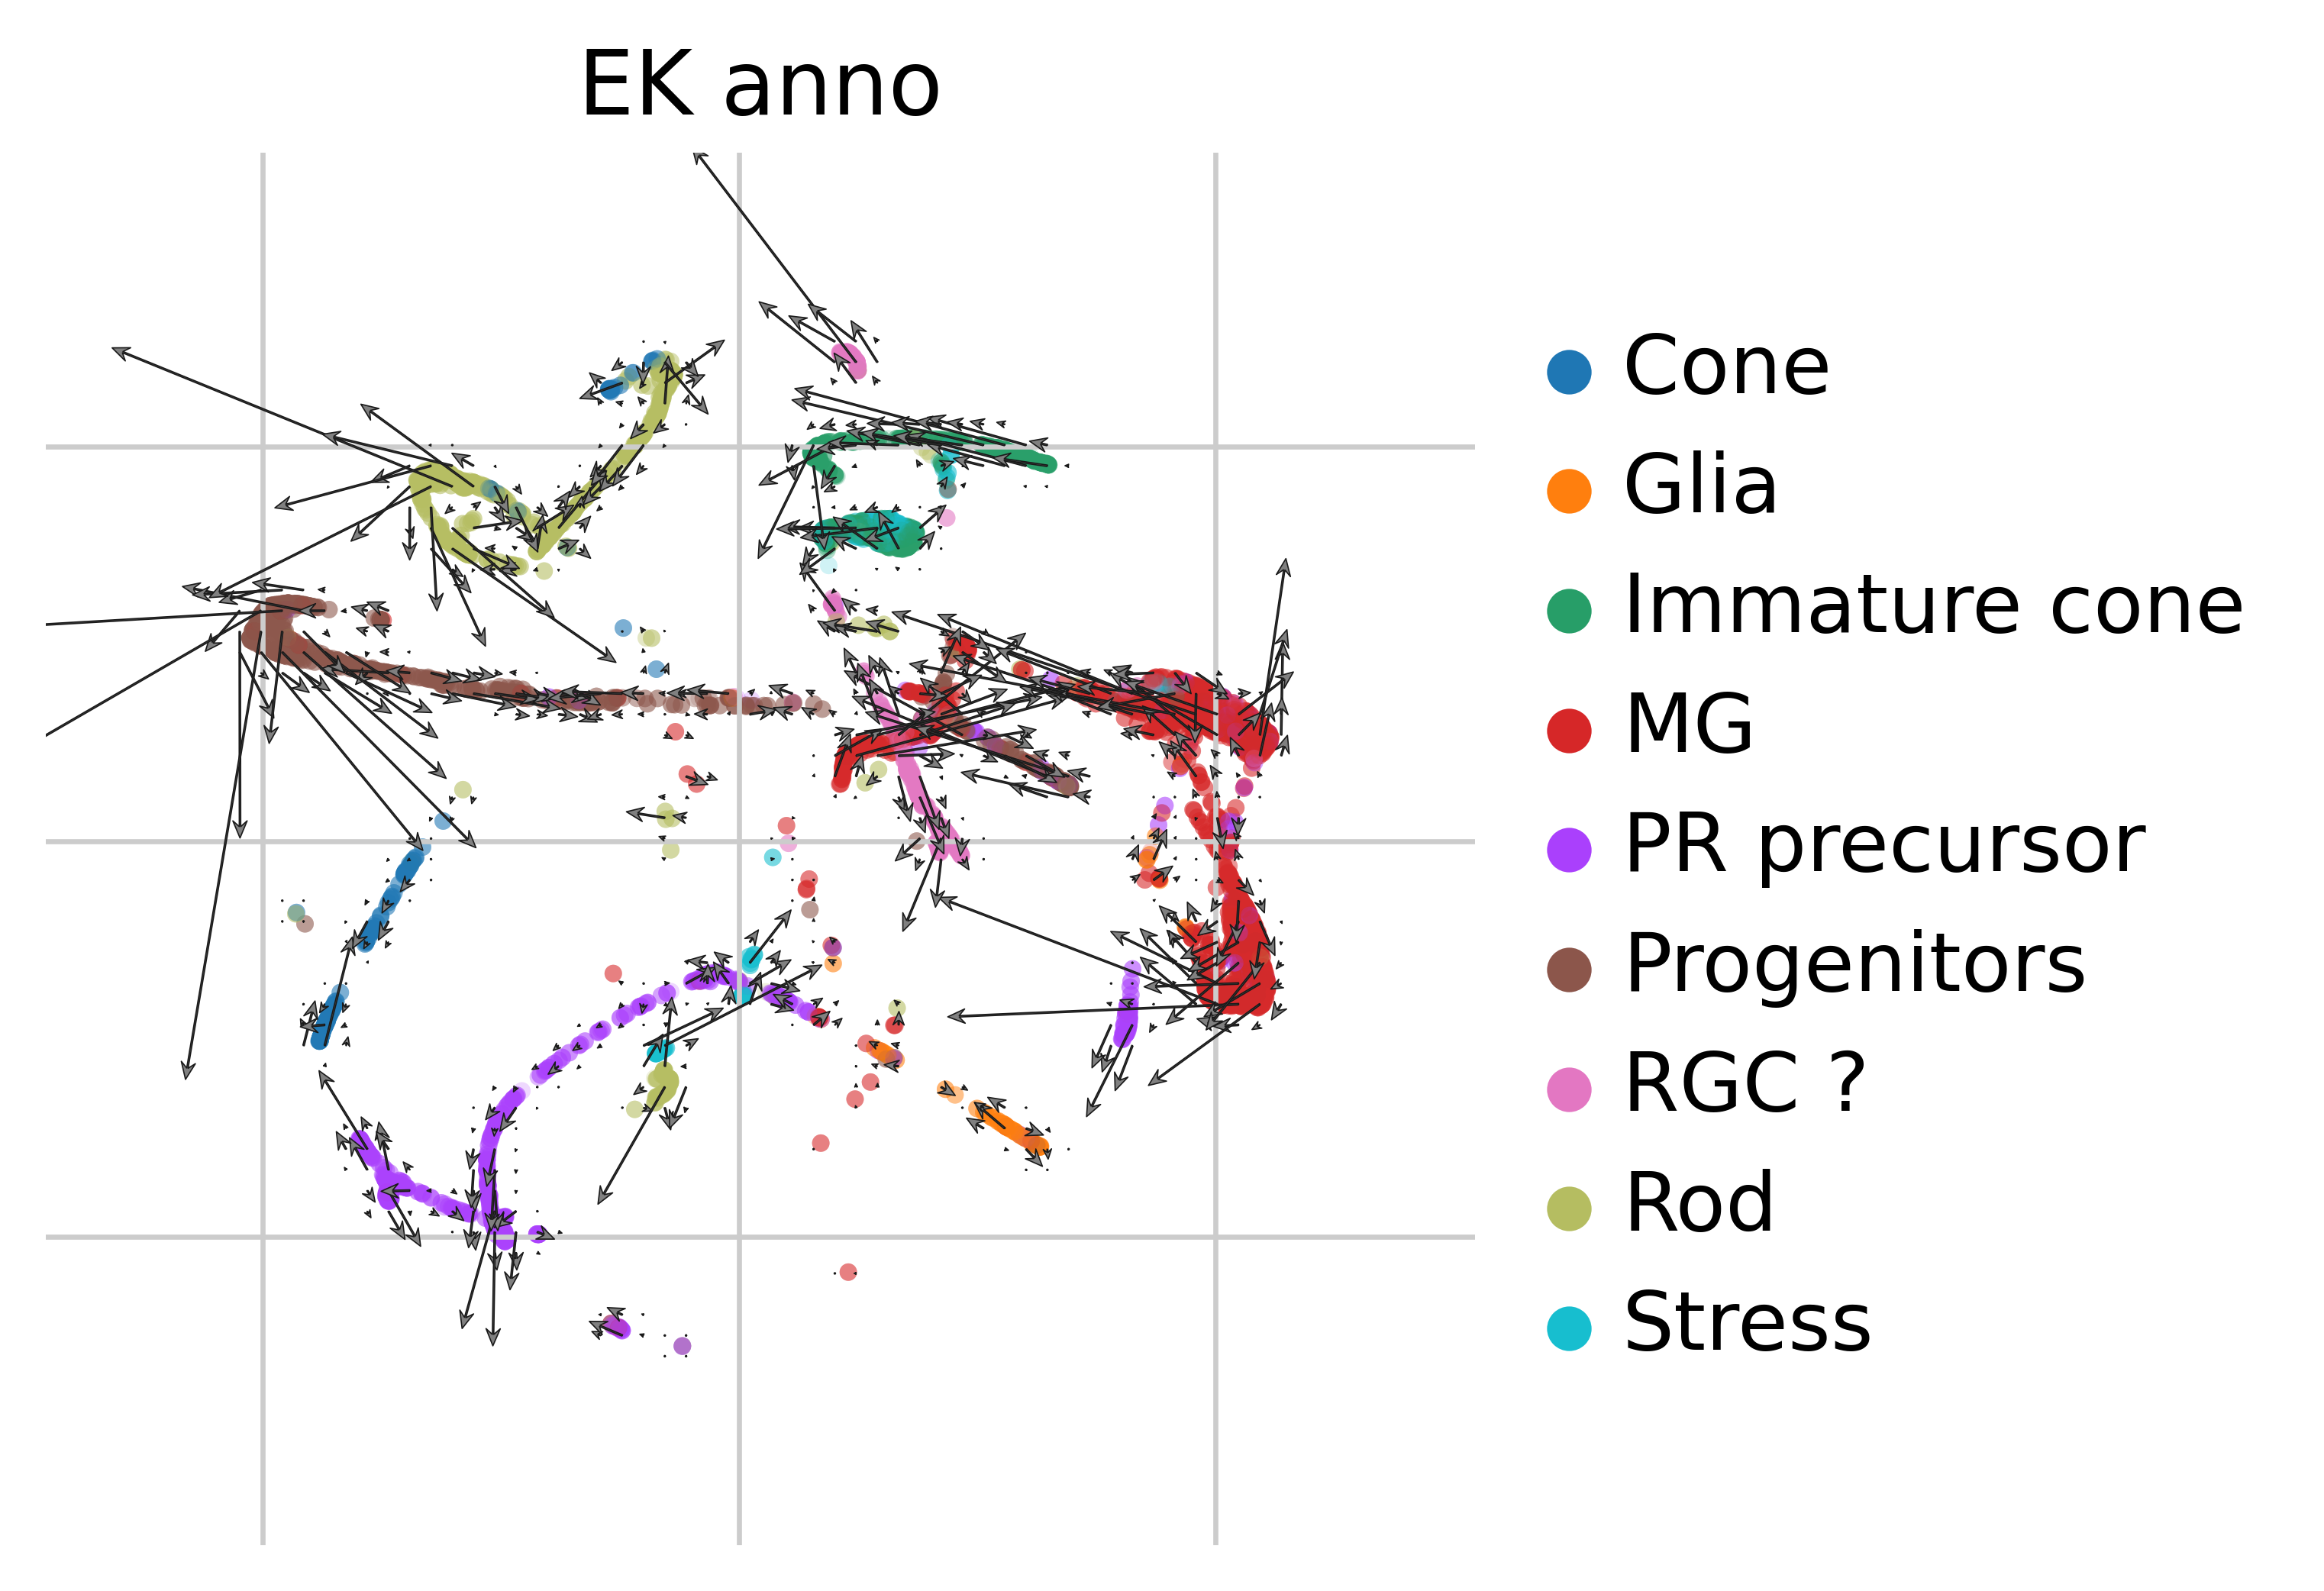

In [57]:
scv.pl.velocity_embedding_grid(adata_tran, basis='draw_graph_fa', color = 'EK_anno', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 8, arrow_size = 2, density = 1, legend_loc = 'right')

In [120]:
adata_pr = adata_velo[adata_velo.obs['EK_anno'].isin(['Rod'])]

In [104]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 81 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:06)


In [101]:
sc.pp.neighbors(adata_velo)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)


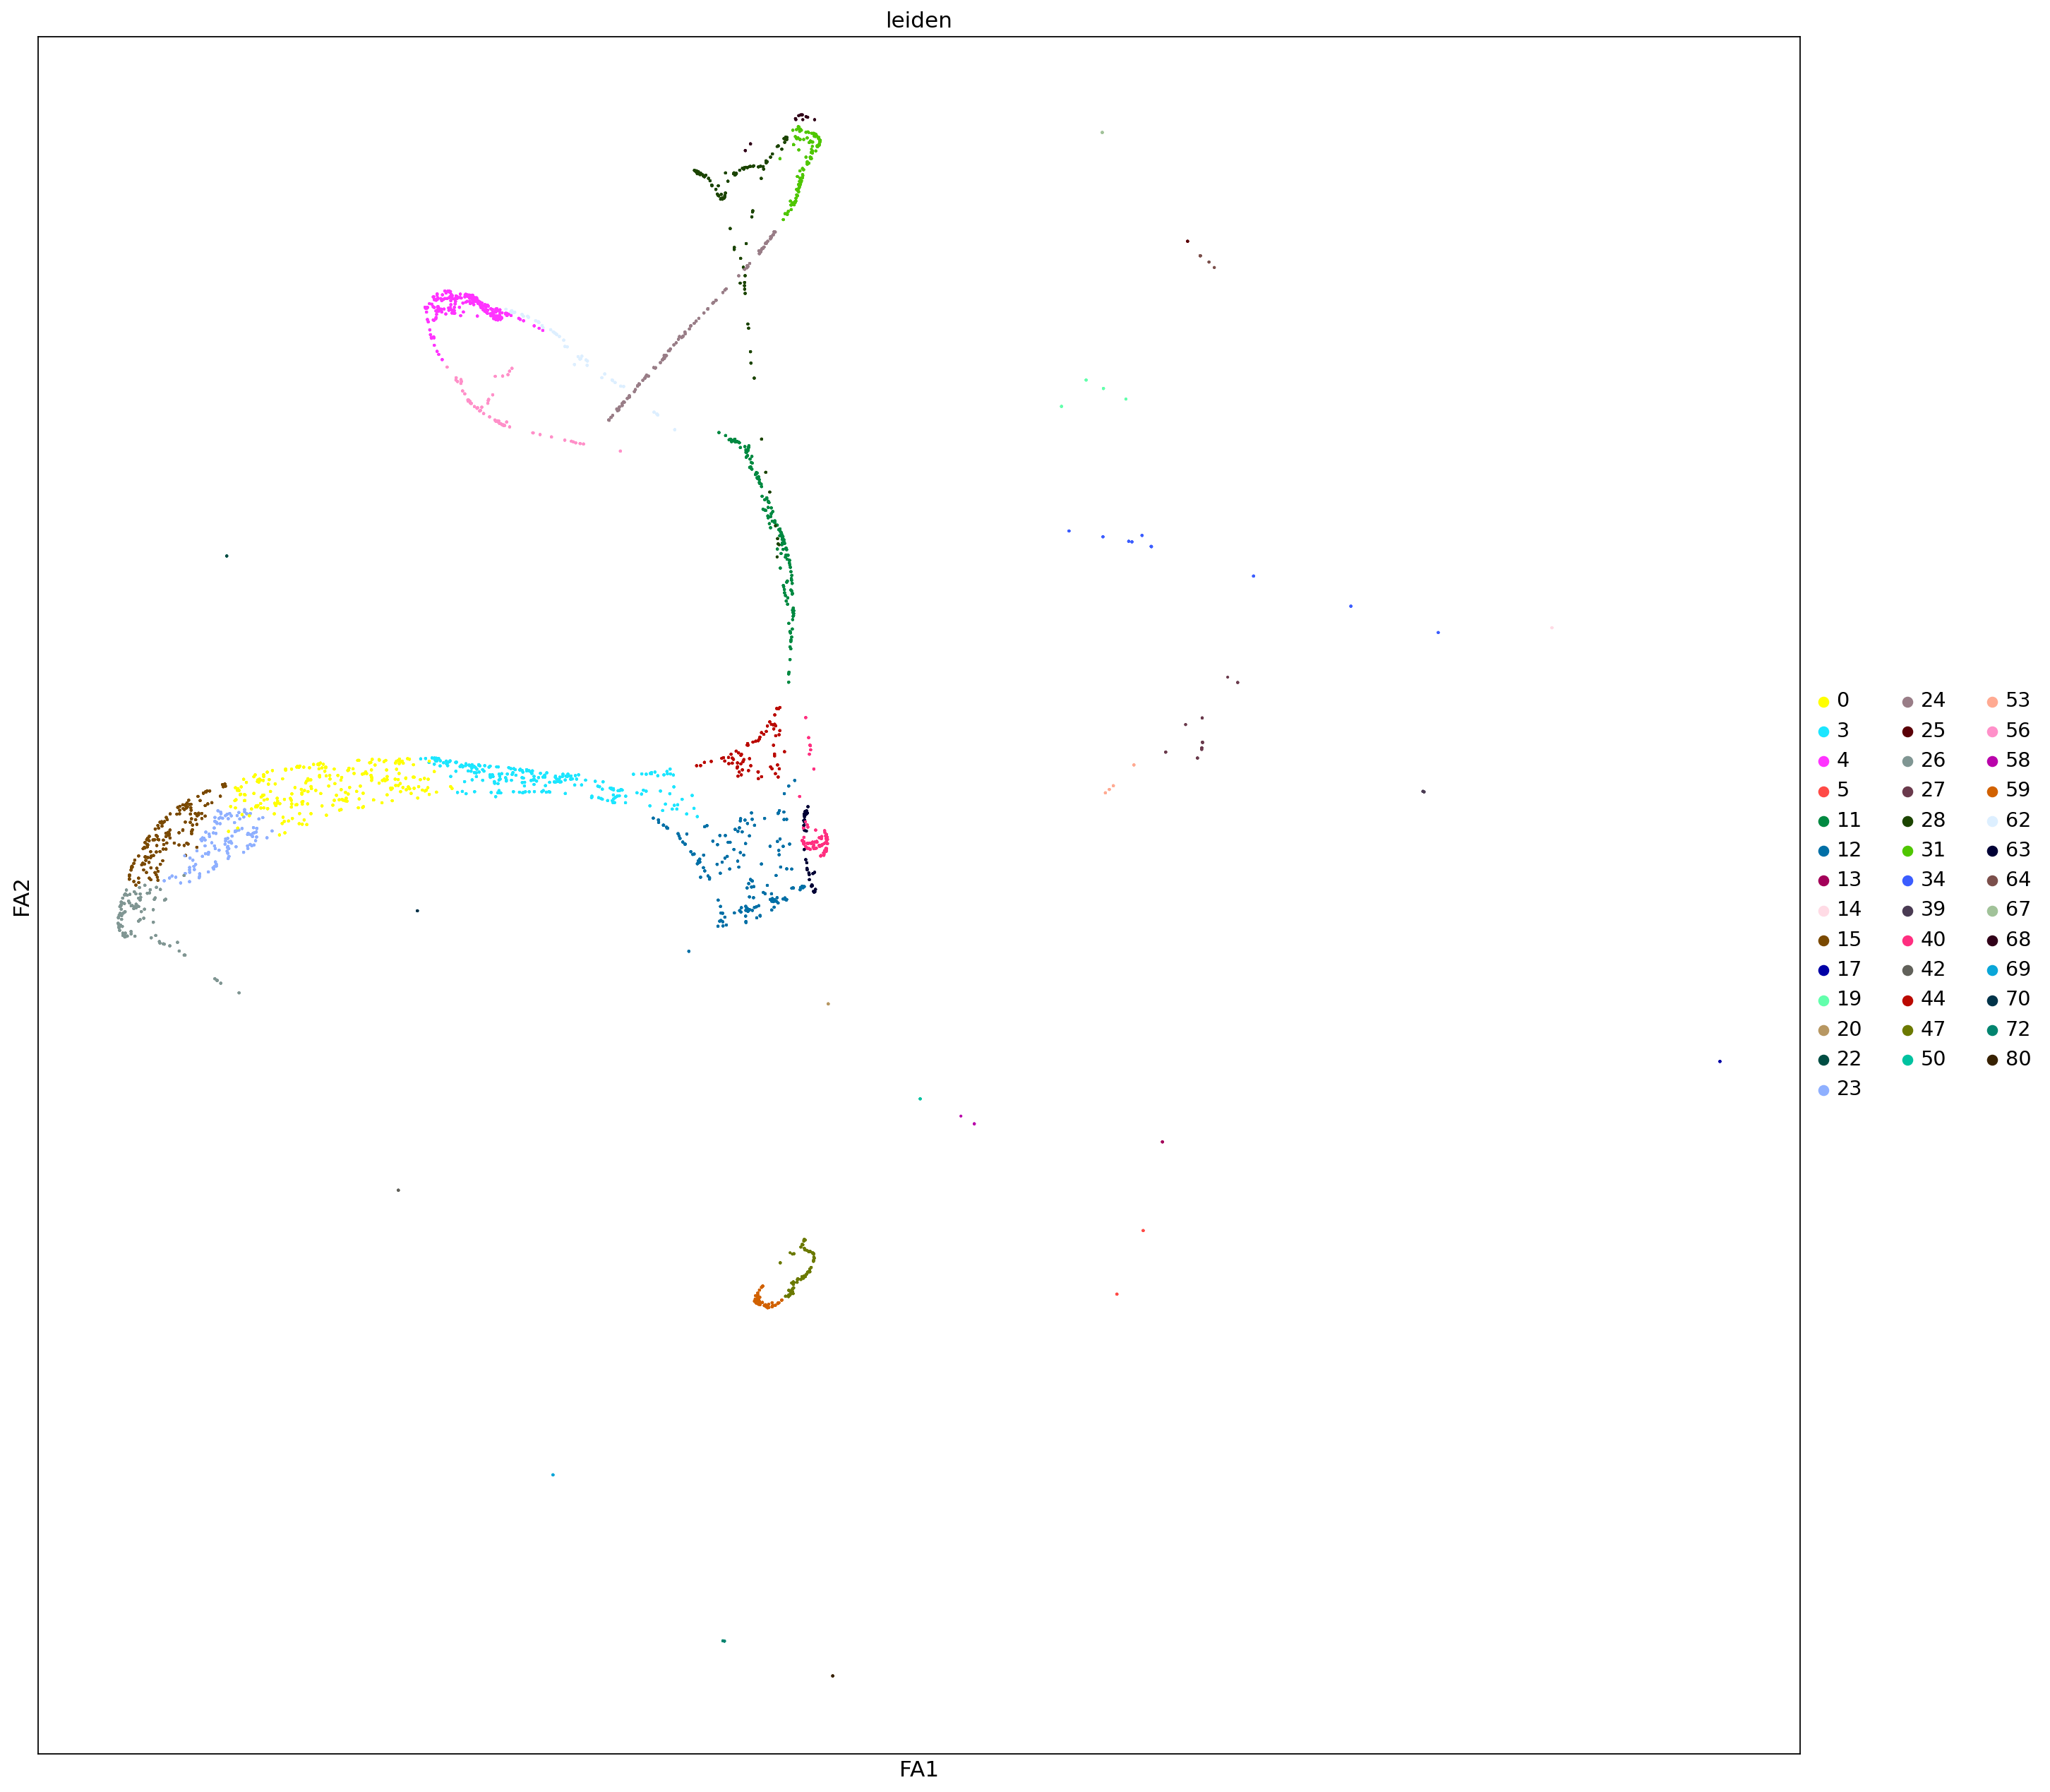

In [121]:
sc.pl.draw_graph(adata_pr,color=['leiden'], layout = 'fa')

In [124]:
adata_pr = adata_pr[adata_pr.obs['leiden'].isin(['68','31','28','24','62','4','56','11','44','68','40','12','3','0','23','26','15','63'])]

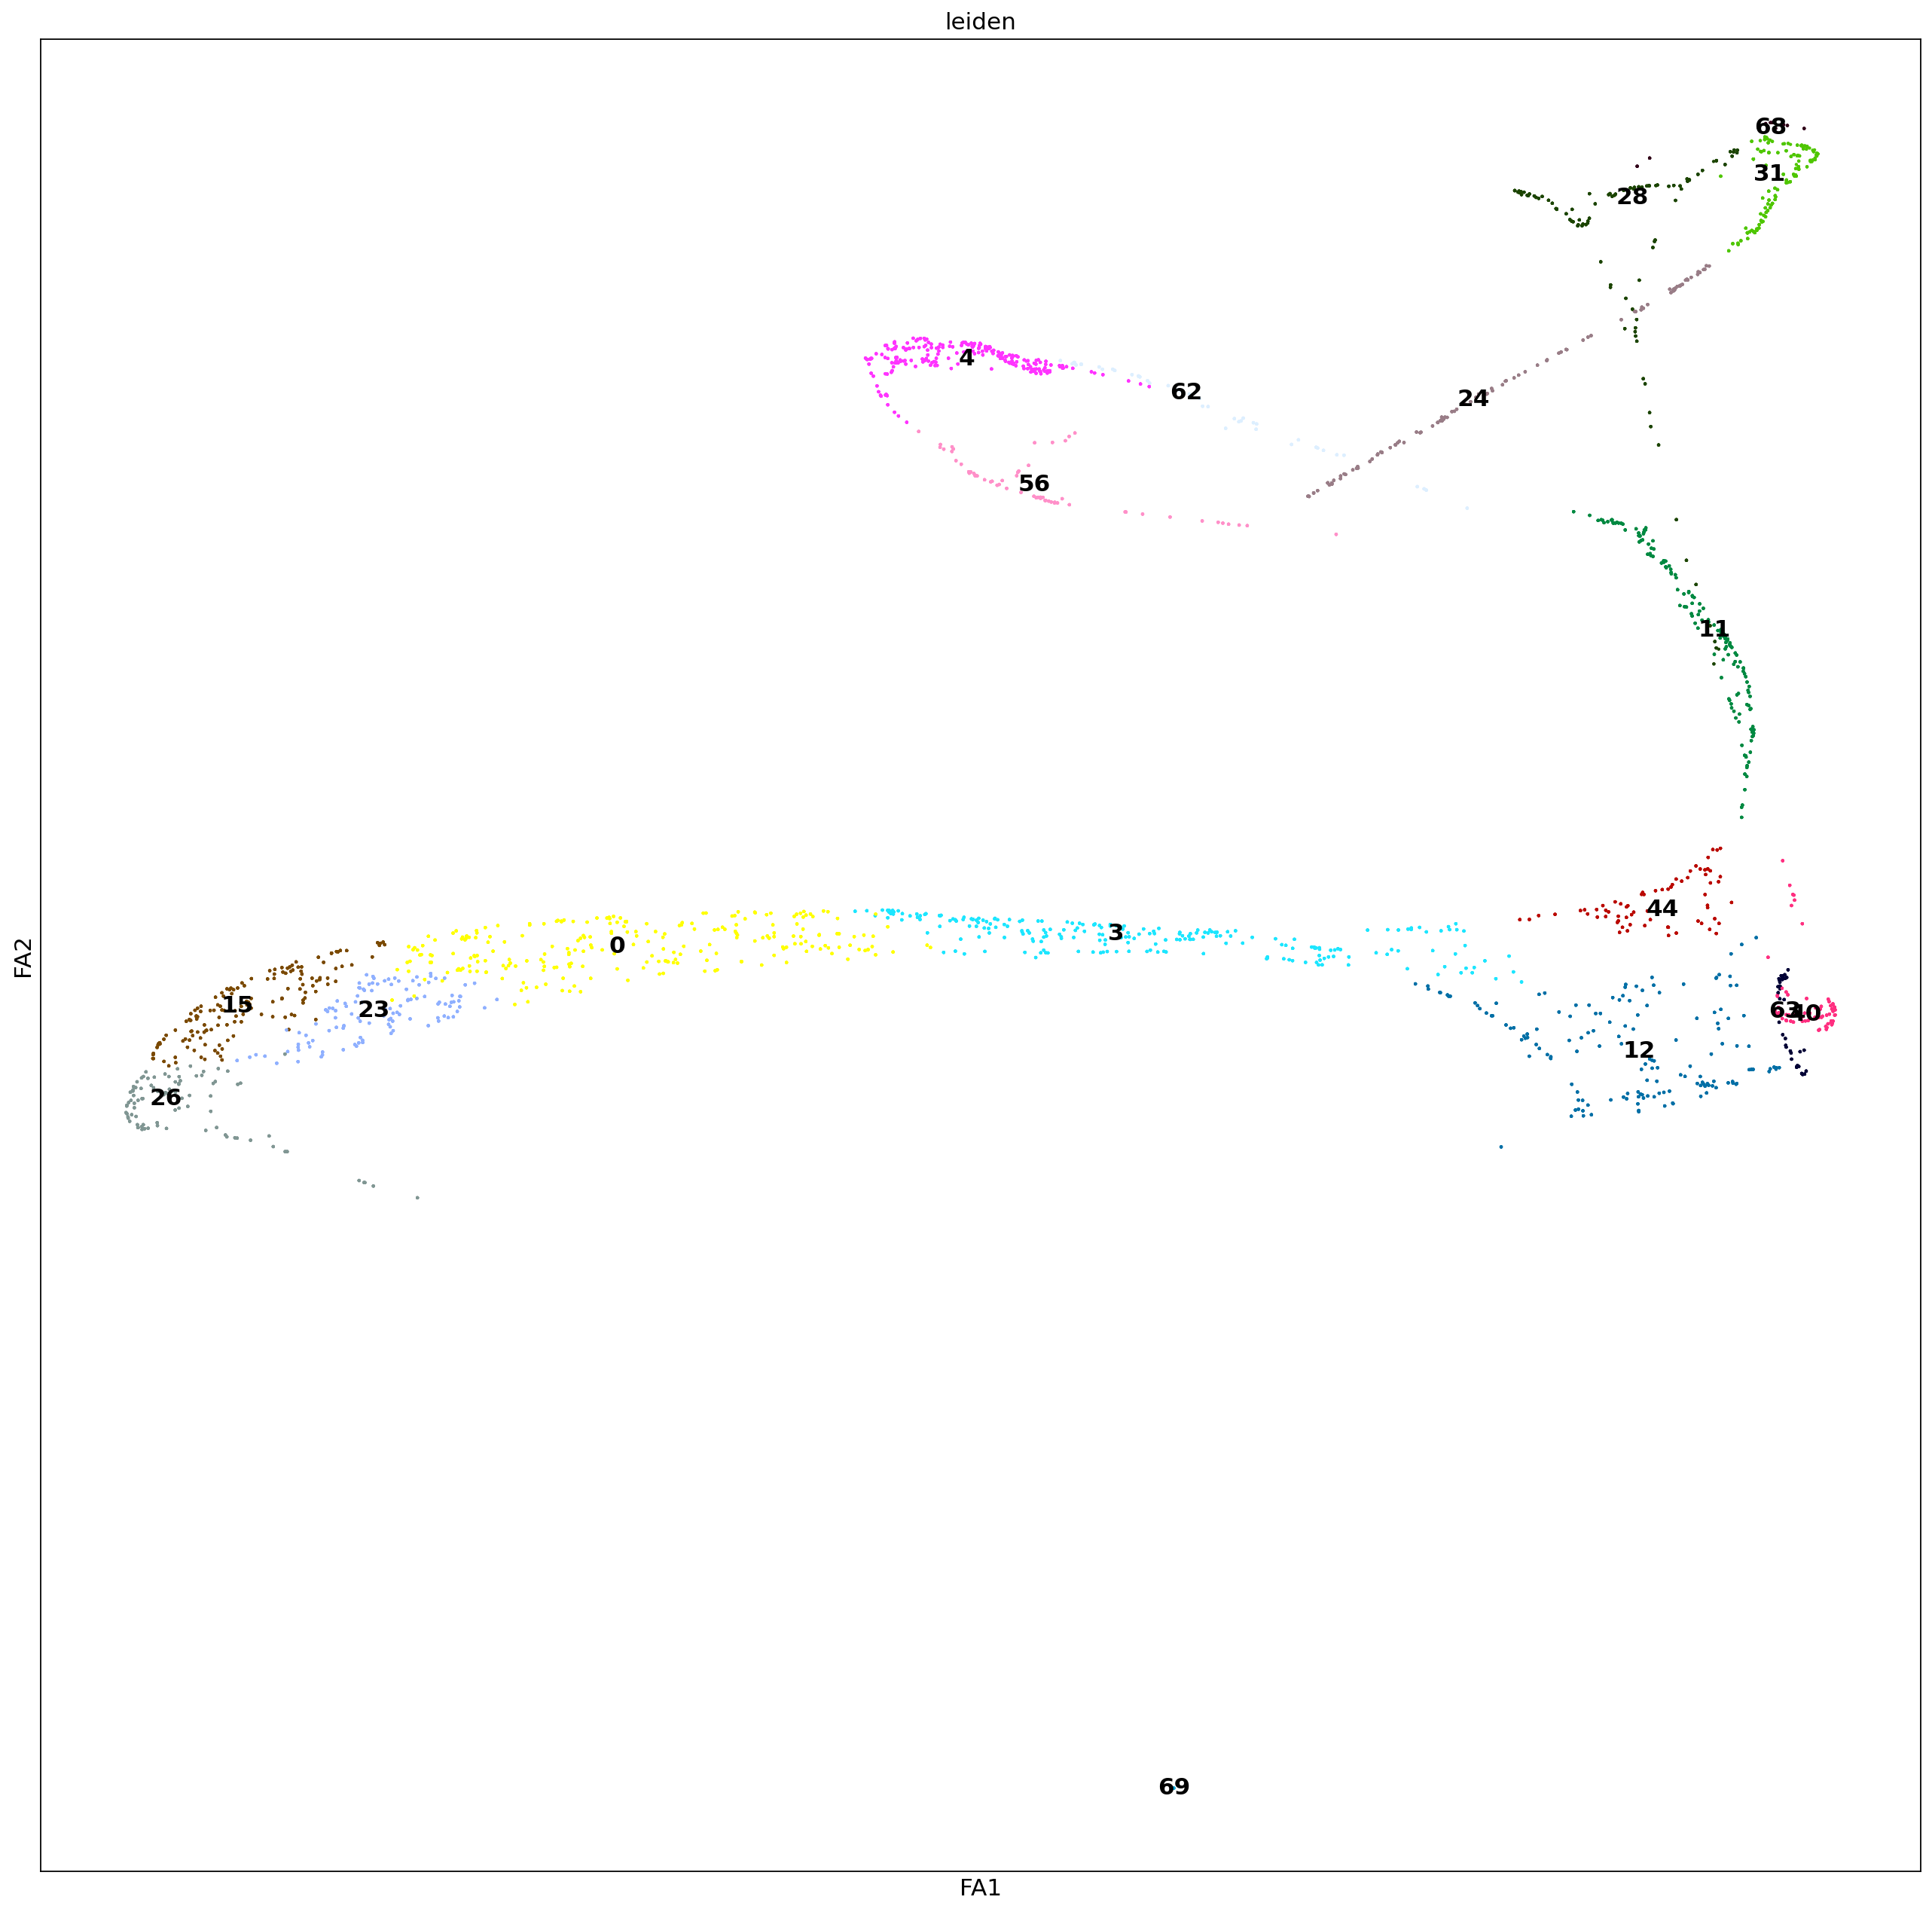

In [123]:
sc.pl.draw_graph(adata_pr,color=['leiden'], layout = 'fa', legend_loc = 'on data')

In [125]:
adata_pr1 = adata_pr

computing PCA
    with n_comps=50
    finished (0:00:45)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:01:05)


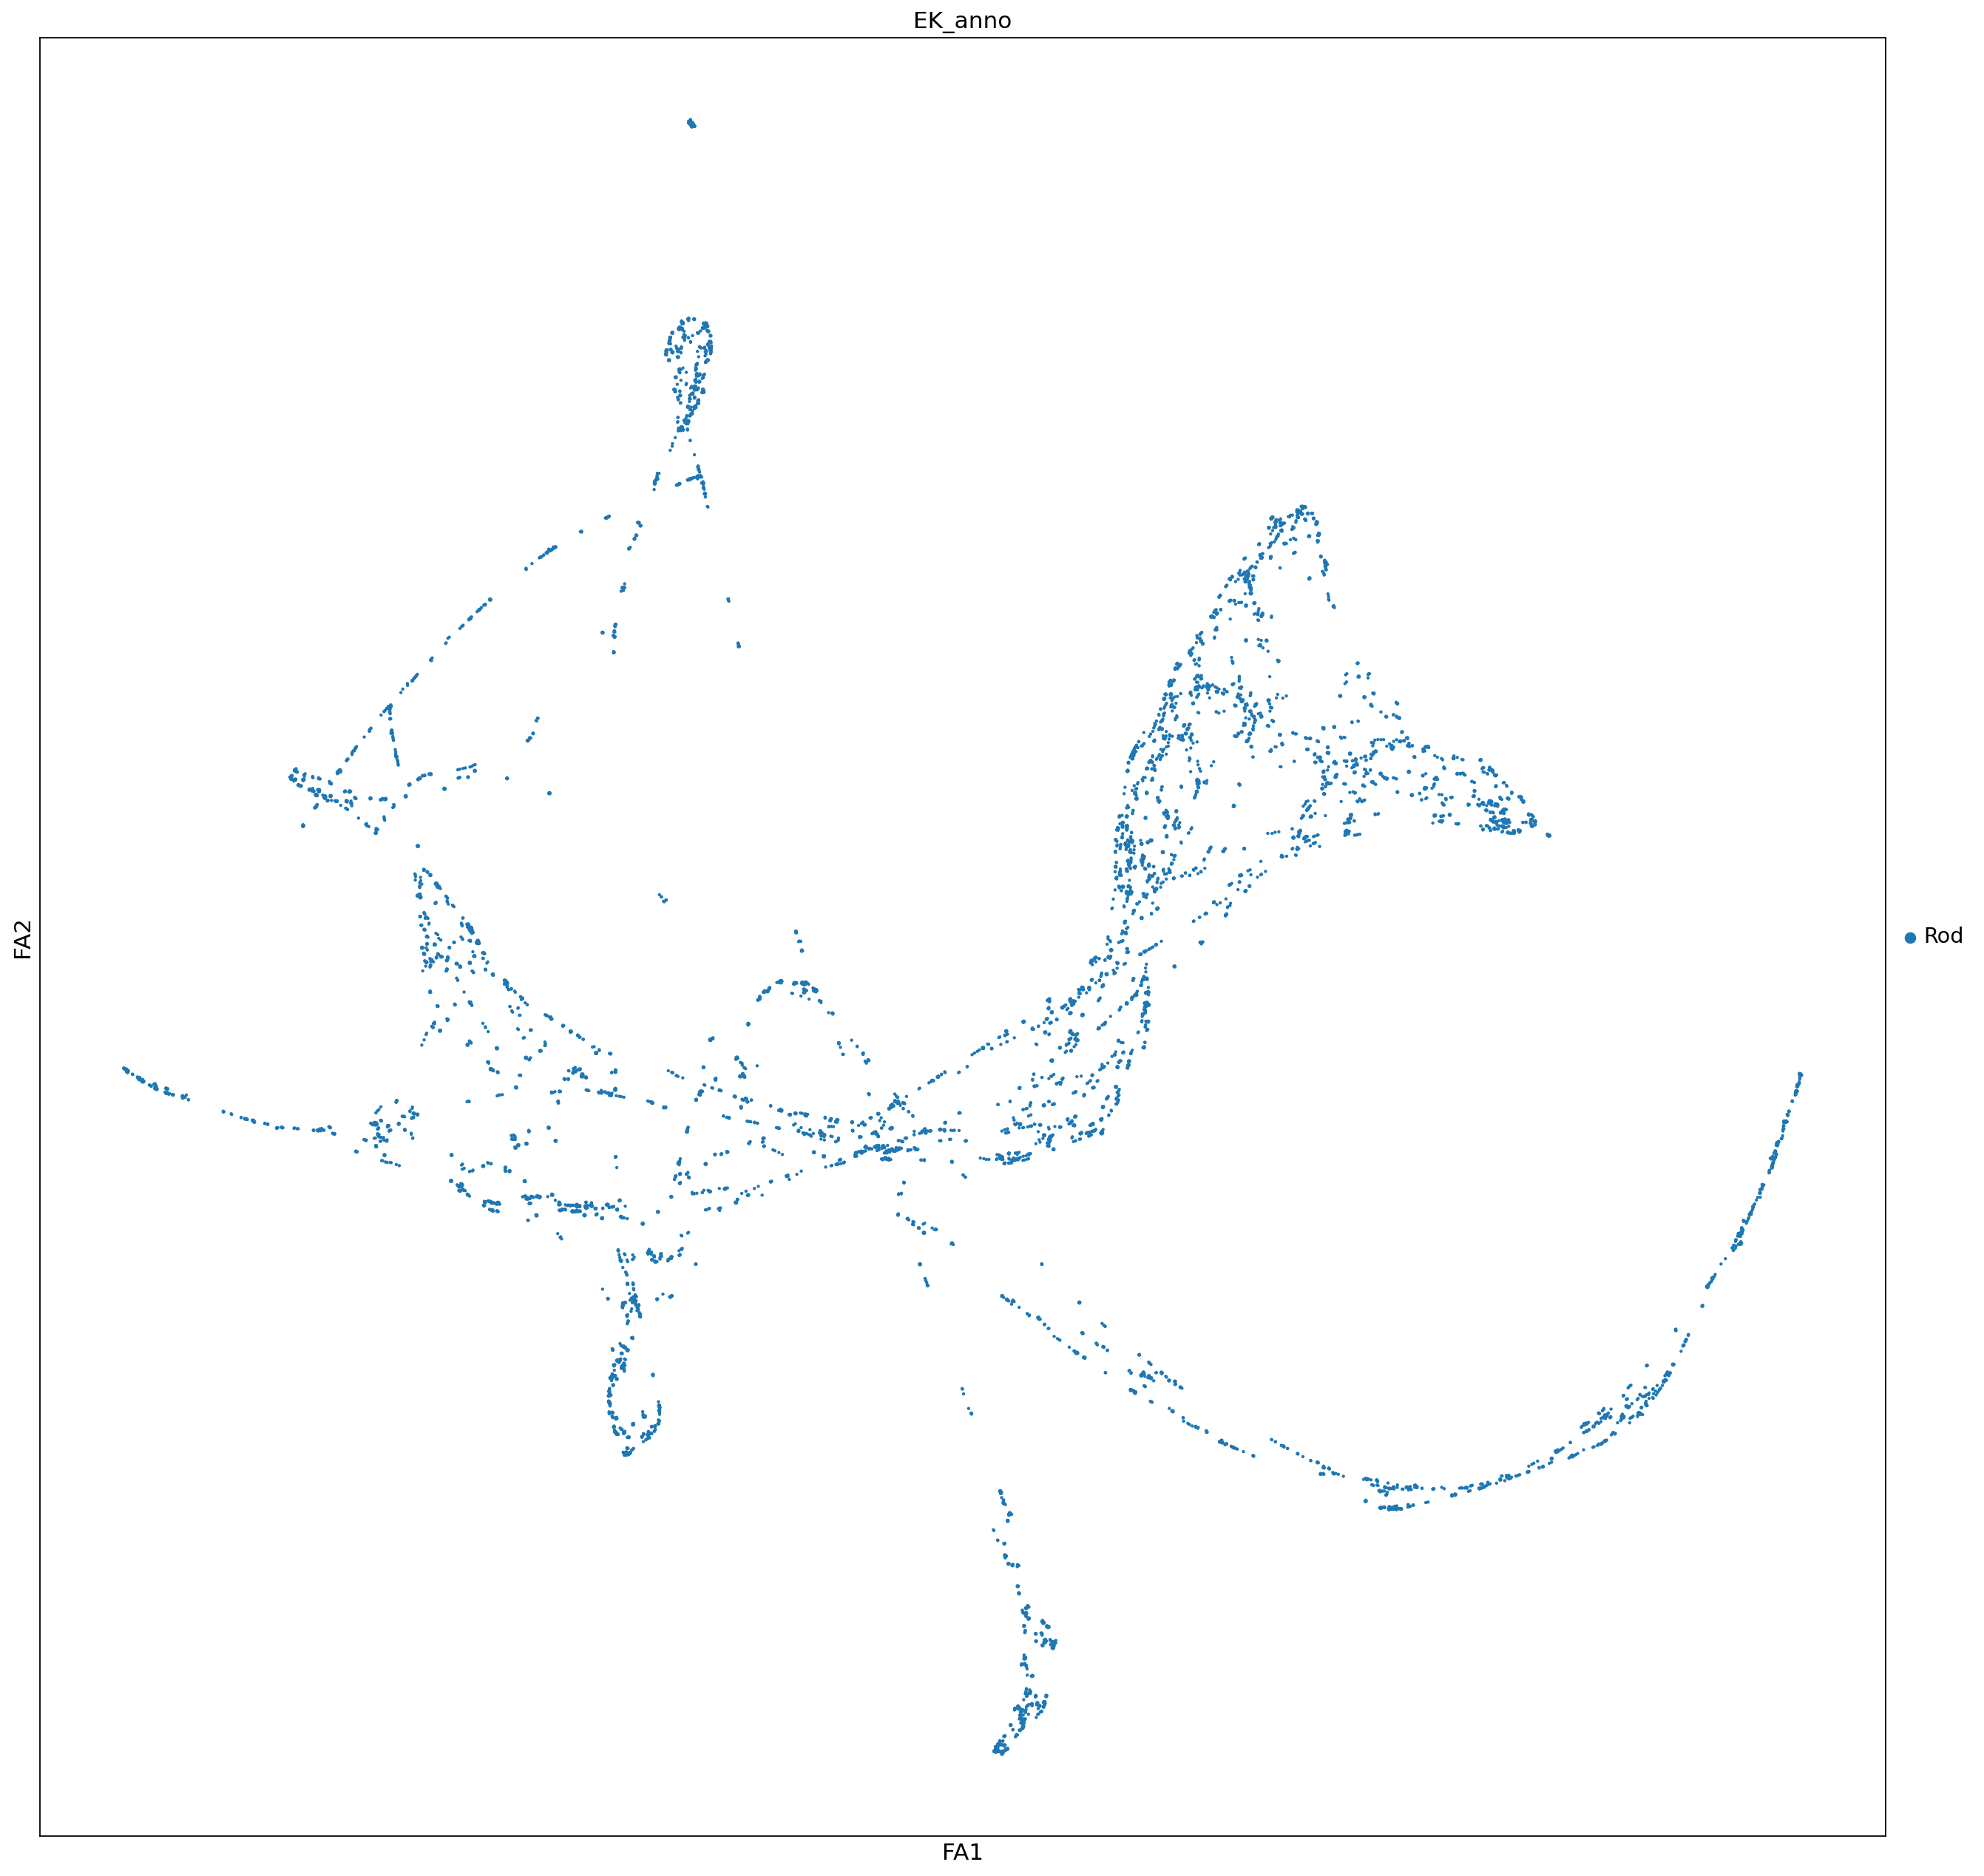

In [126]:
sc.pp.pca(adata_pr)
pca_projections = pd.DataFrame(adata_pr.obsm["X_pca"],index=adata_pr.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=10)
adata_pr.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata_pr,n_neighbors=30,use_rep="X_palantir")
adata_pr.obsm["X_pca2d"]=adata_pr.obsm["X_pca"][:,:3]
sc.tl.draw_graph(adata_pr, layout = 'fa',init_pos='X_pca2d')
sc.pl.draw_graph(adata_pr,color=['EK_anno'], layout = 'fa')

In [127]:
sc.set_figure_params()

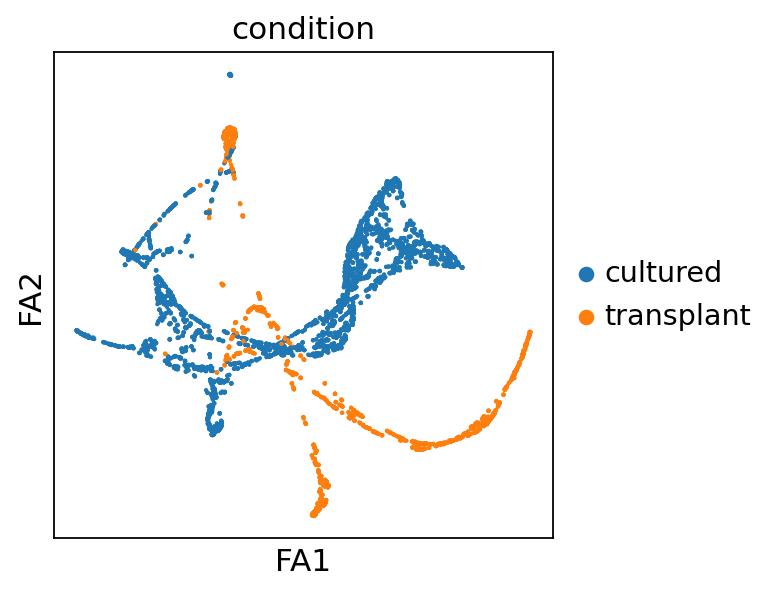

In [128]:
sc.pl.draw_graph(adata_pr,color=['condition'], layout = 'fa')

In [145]:
adata_cult_pr = adata_pr[adata_pr.obs['condition'].isin(['cultured'])]
adata_tran_pr = adata_pr[adata_pr.obs['condition'].isin(['transplant'])]

In [156]:
sc.tl.umap(adata_cult_pr)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


In [157]:
sc.pl.umap(adata_cult_pr)

In [158]:
sc.tl.umap(adata_tran_pr)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [159]:
sc.pl.umap(adata_tran_pr)

In [160]:
scv.pp.filter_and_normalize(adata_cult_pr, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_cult_pr, n_pcs=30, n_neighbors=30)
scv.pp.filter_and_normalize(adata_tran_pr, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_tran_pr, n_pcs=30, n_neighbors=30)

Filtered out 29669 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
Filtered out 33141 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [153]:
sc.pp.pca(adata_cult_pr)
pca_projections = pd.DataFrame(adata_cult_pr.obsm["X_pca"],index=adata_cult_pr.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=10)
adata_cult_pr.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata_cult_pr,n_neighbors=30,use_rep="X_palantir")
adata_cult_pr.obsm["X_pca2d"]=adata_cult_pr.obsm["X_pca"][:,:3]
sc.tl.draw_graph(adata_cult_pr, layout = 'fa',init_pos='X_pca2d')

sc.pp.pca(adata_tran_pr)
pca_projections = pd.DataFrame(adata_tran_pr.obsm["X_pca"],index=adata_tran_pr.obs_names)
dm_res = palantir.utils.run_diffusion_maps(pca_projections)
ms_data = palantir.utils.determine_multiscale_space(dm_res,n_eigs=10)
adata_tran_pr.obsm["X_palantir"]=ms_data.values
sc.pp.neighbors(adata_tran_pr,n_neighbors=30,use_rep="X_palantir")
adata_tran_pr.obsm["X_pca2d"]=adata_tran_pr.obsm["X_pca"][:,:3]
sc.tl.draw_graph(adata_tran_pr, layout = 'fa',init_pos='X_pca2d')

computing PCA
    with n_comps=50
    finished (0:00:34)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:41)
computing PCA
    with n_comps=50
    finished (0:00:08)
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances 

In [154]:
sc.pl.draw_graph(adata_cult_pr,color=['Celltype'], layout = 'fa')

In [186]:
sc.pl.draw_graph(adata_cult_pr,color=['RCVRN'], layout = 'fa', use_raw = False)

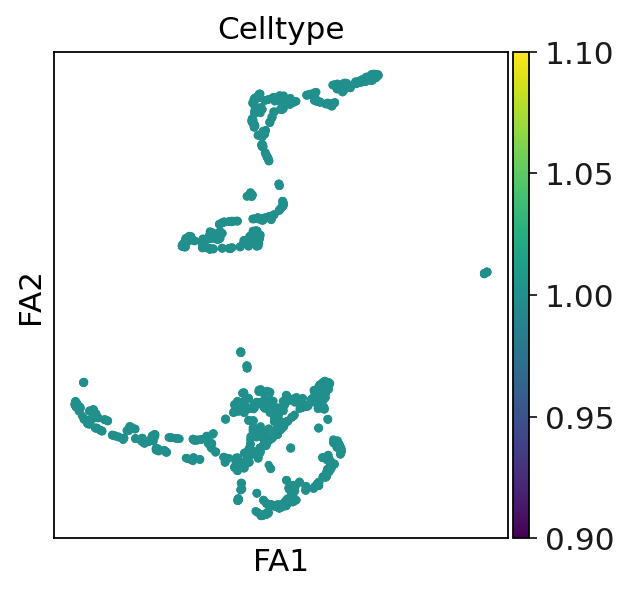

In [155]:
sc.pl.draw_graph(adata_tran_pr,color=['Celltype'], layout = 'fa')

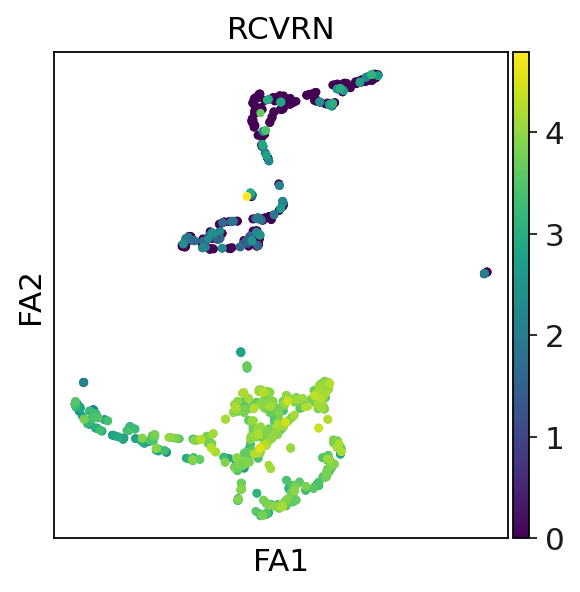

In [187]:
sc.pl.draw_graph(adata_tran_pr,color=['RCVRN'], layout = 'fa', use_raw = False)

In [152]:
scv.pp.remove_duplicate_cells(adata_cult_pr)
scv.pp.remove_duplicate_cells(adata_tran_pr)

Removed 8 duplicate cells.
computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
Removed 15 duplicate cells.
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)


In [161]:
scv.tl.velocity(adata_cult_pr)
scv.tl.velocity(adata_tran_pr)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [162]:
scv.tl.velocity_graph(adata_cult_pr)
scv.tl.velocity_graph(adata_tran_pr)

computing velocity graph (using 1/12 cores)


  0%|          | 0/5737 [00:00<?, ?cells/s]

    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 1/12 cores)


  0%|          | 0/2124 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


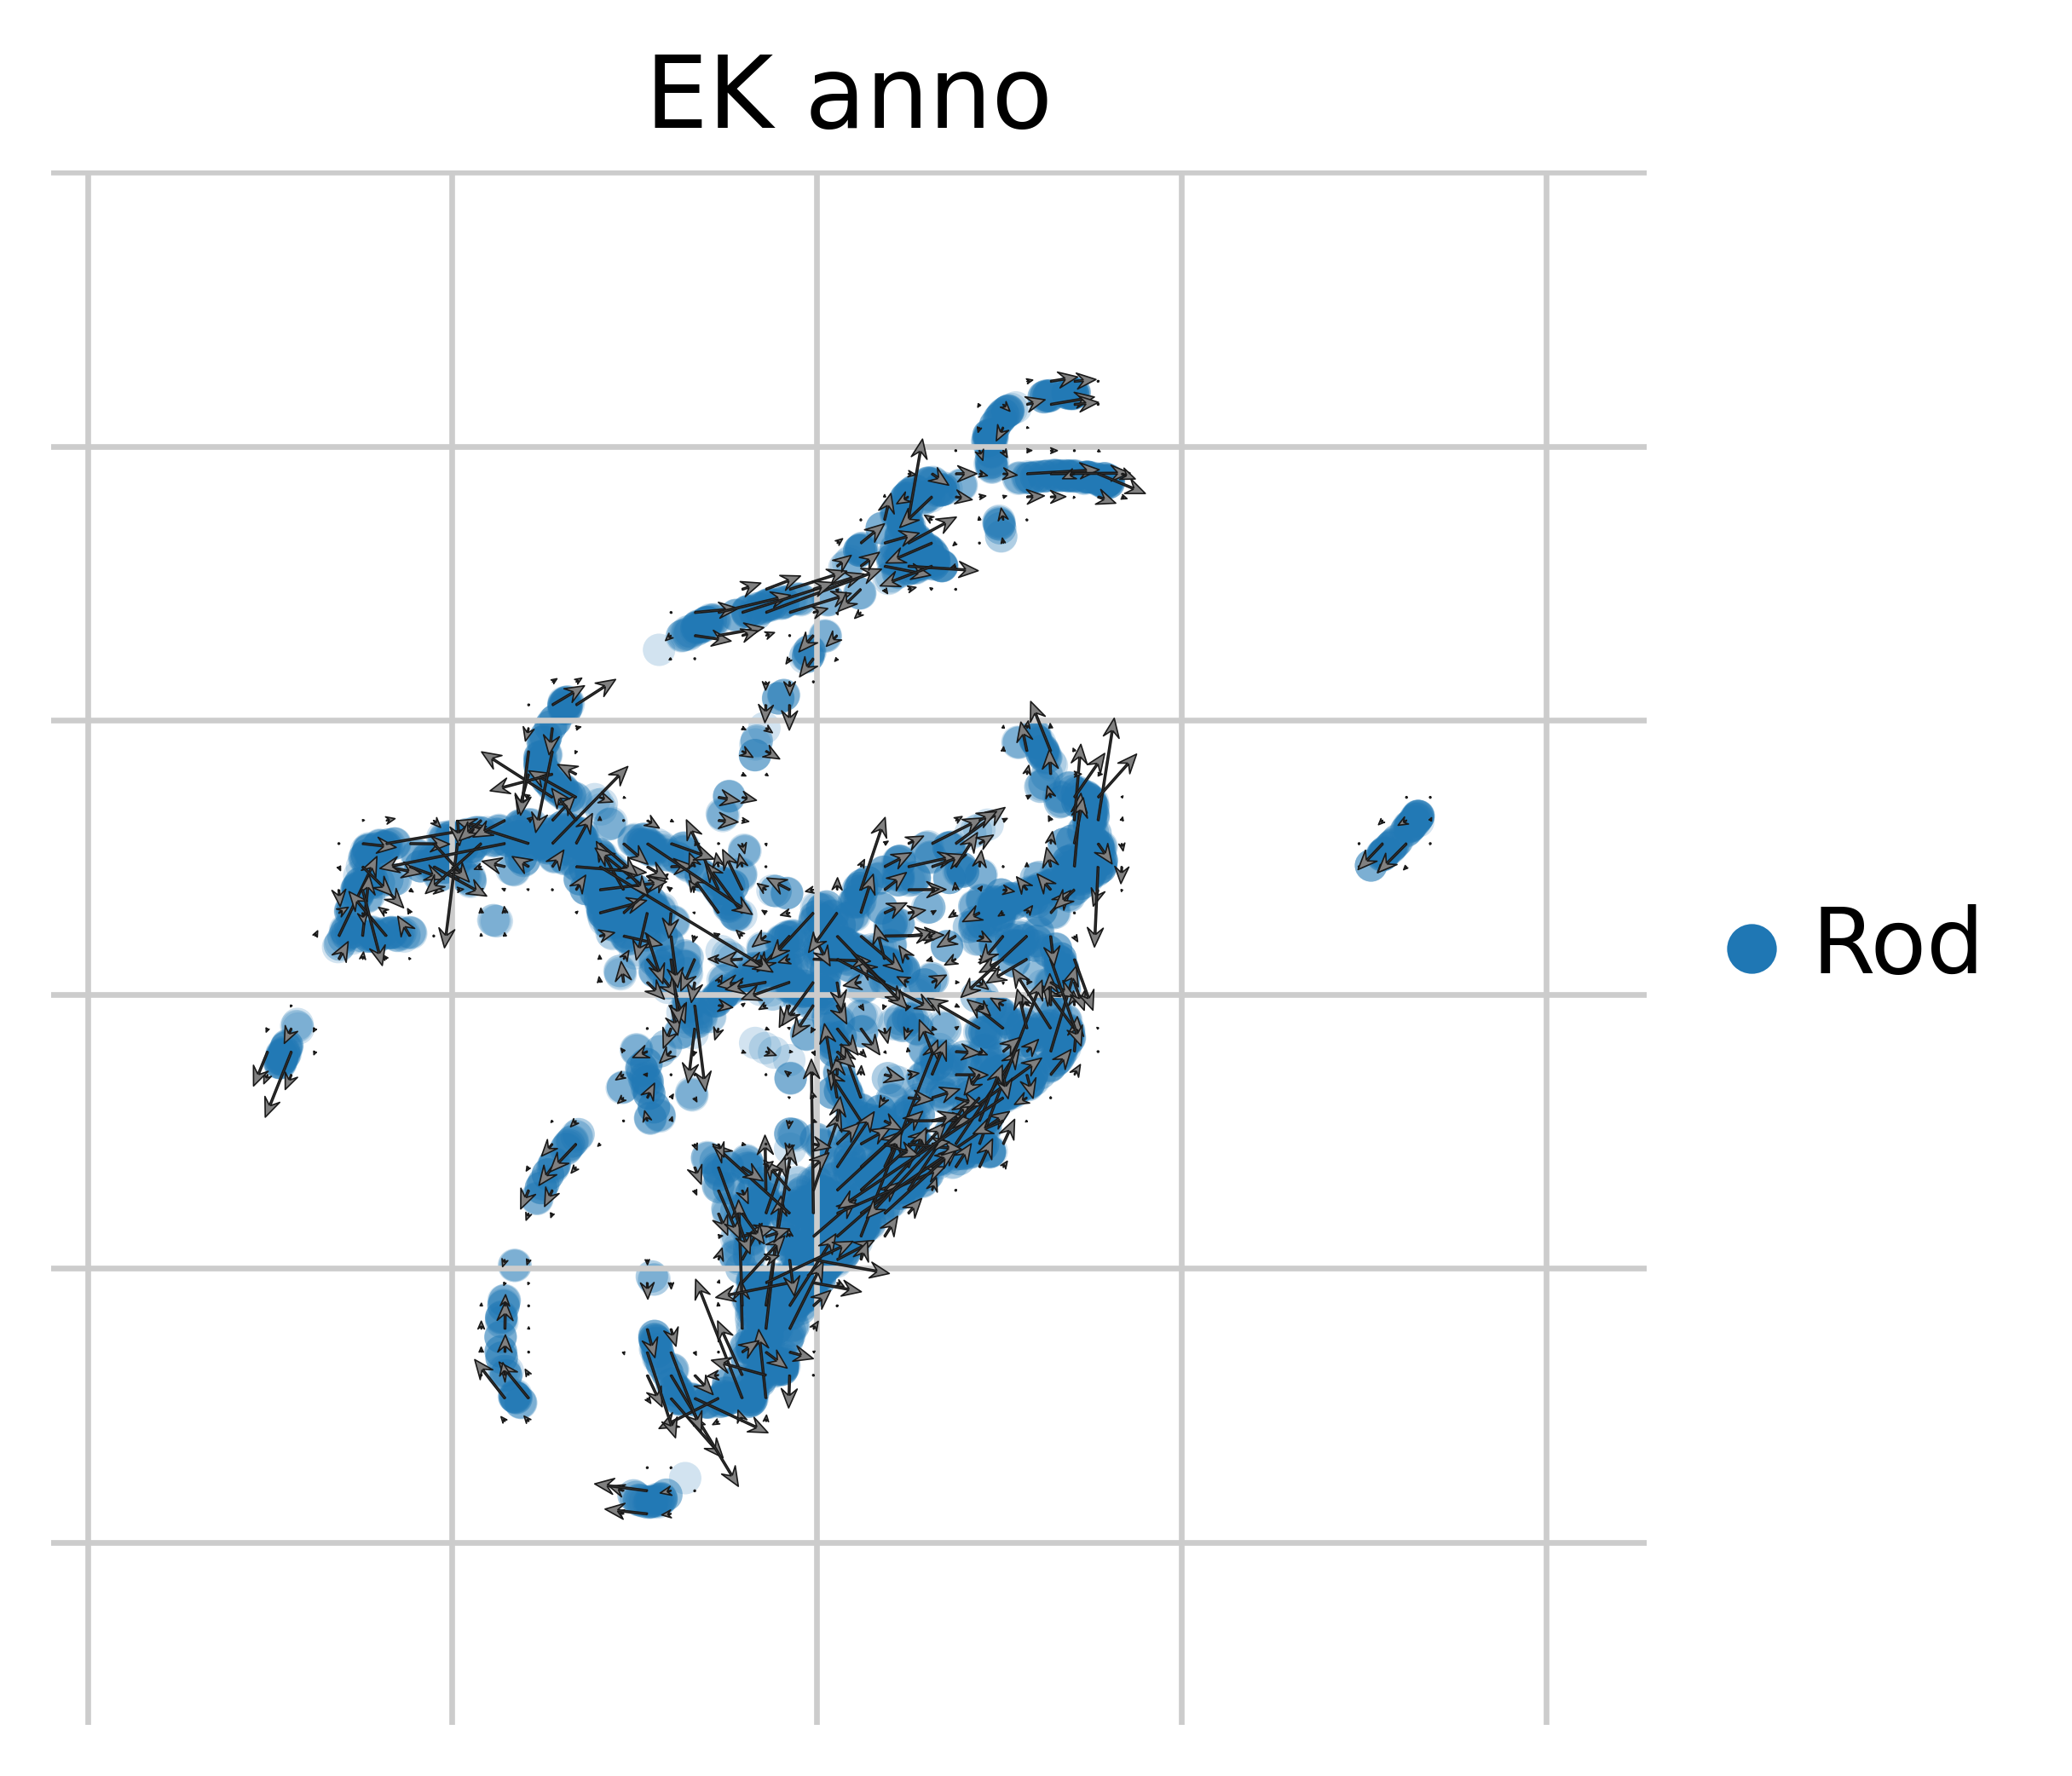

In [165]:
scv.pl.velocity_embedding_grid(adata_cult_pr, basis='draw_graph_fa', color = 'EK_anno', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 6, arrow_size = 2, density = 1, legend_loc= 'right')

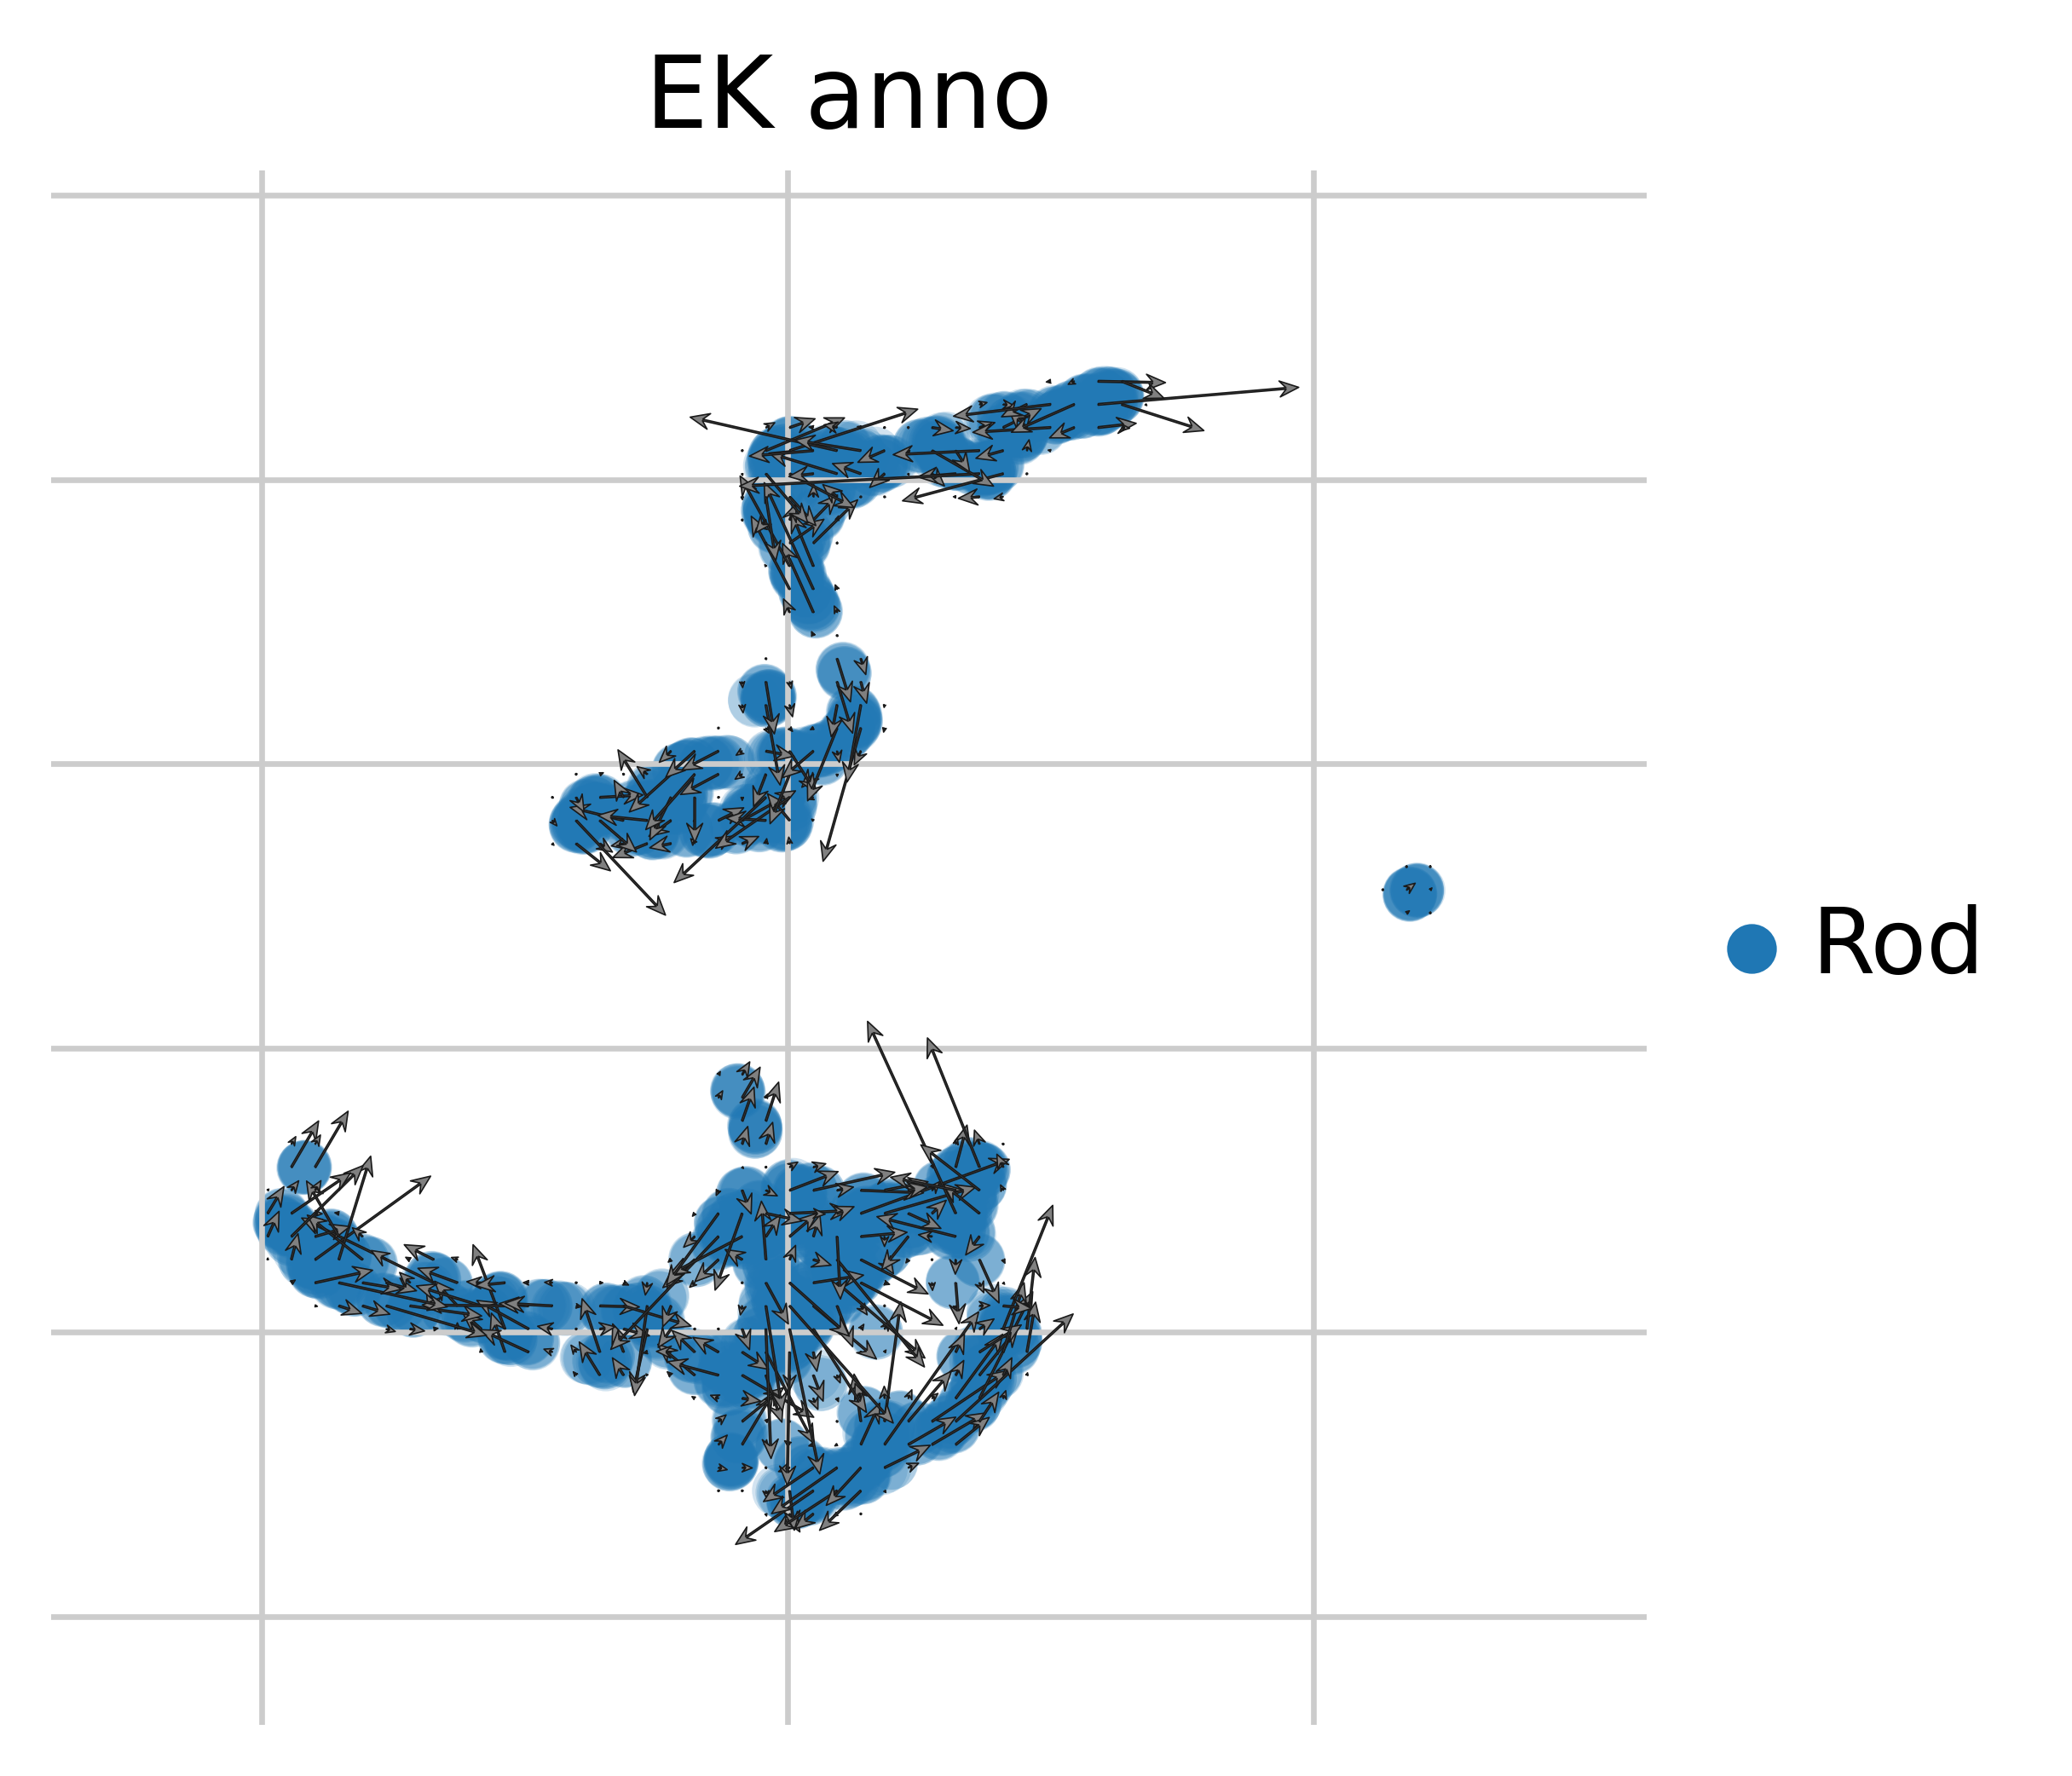

In [166]:
scv.pl.velocity_embedding_grid(adata_tran_pr, basis='draw_graph_fa', color = 'EK_anno', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 6, arrow_size = 2, density = 1, legend_loc= 'right')

In [167]:
scv.tl.recover_dynamics(adata_cult_pr)
scv.tl.recover_dynamics(adata_tran_pr)

recovering dynamics (using 1/12 cores)


  0%|          | 0/149 [00:00<?, ?gene/s]

    finished (0:01:51) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
recovering dynamics (using 1/12 cores)


  0%|          | 0/65 [00:00<?, ?gene/s]

    finished (0:00:30) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [170]:
scv.tl.velocity(adata_cult_pr, mode='dynamical')
scv.tl.velocity_graph(adata_cult_pr)
scv.tl.velocity(adata_tran_pr, mode='dynamical')
scv.tl.velocity_graph(adata_tran_pr)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/5737 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)


  0%|          | 0/2124 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:01) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


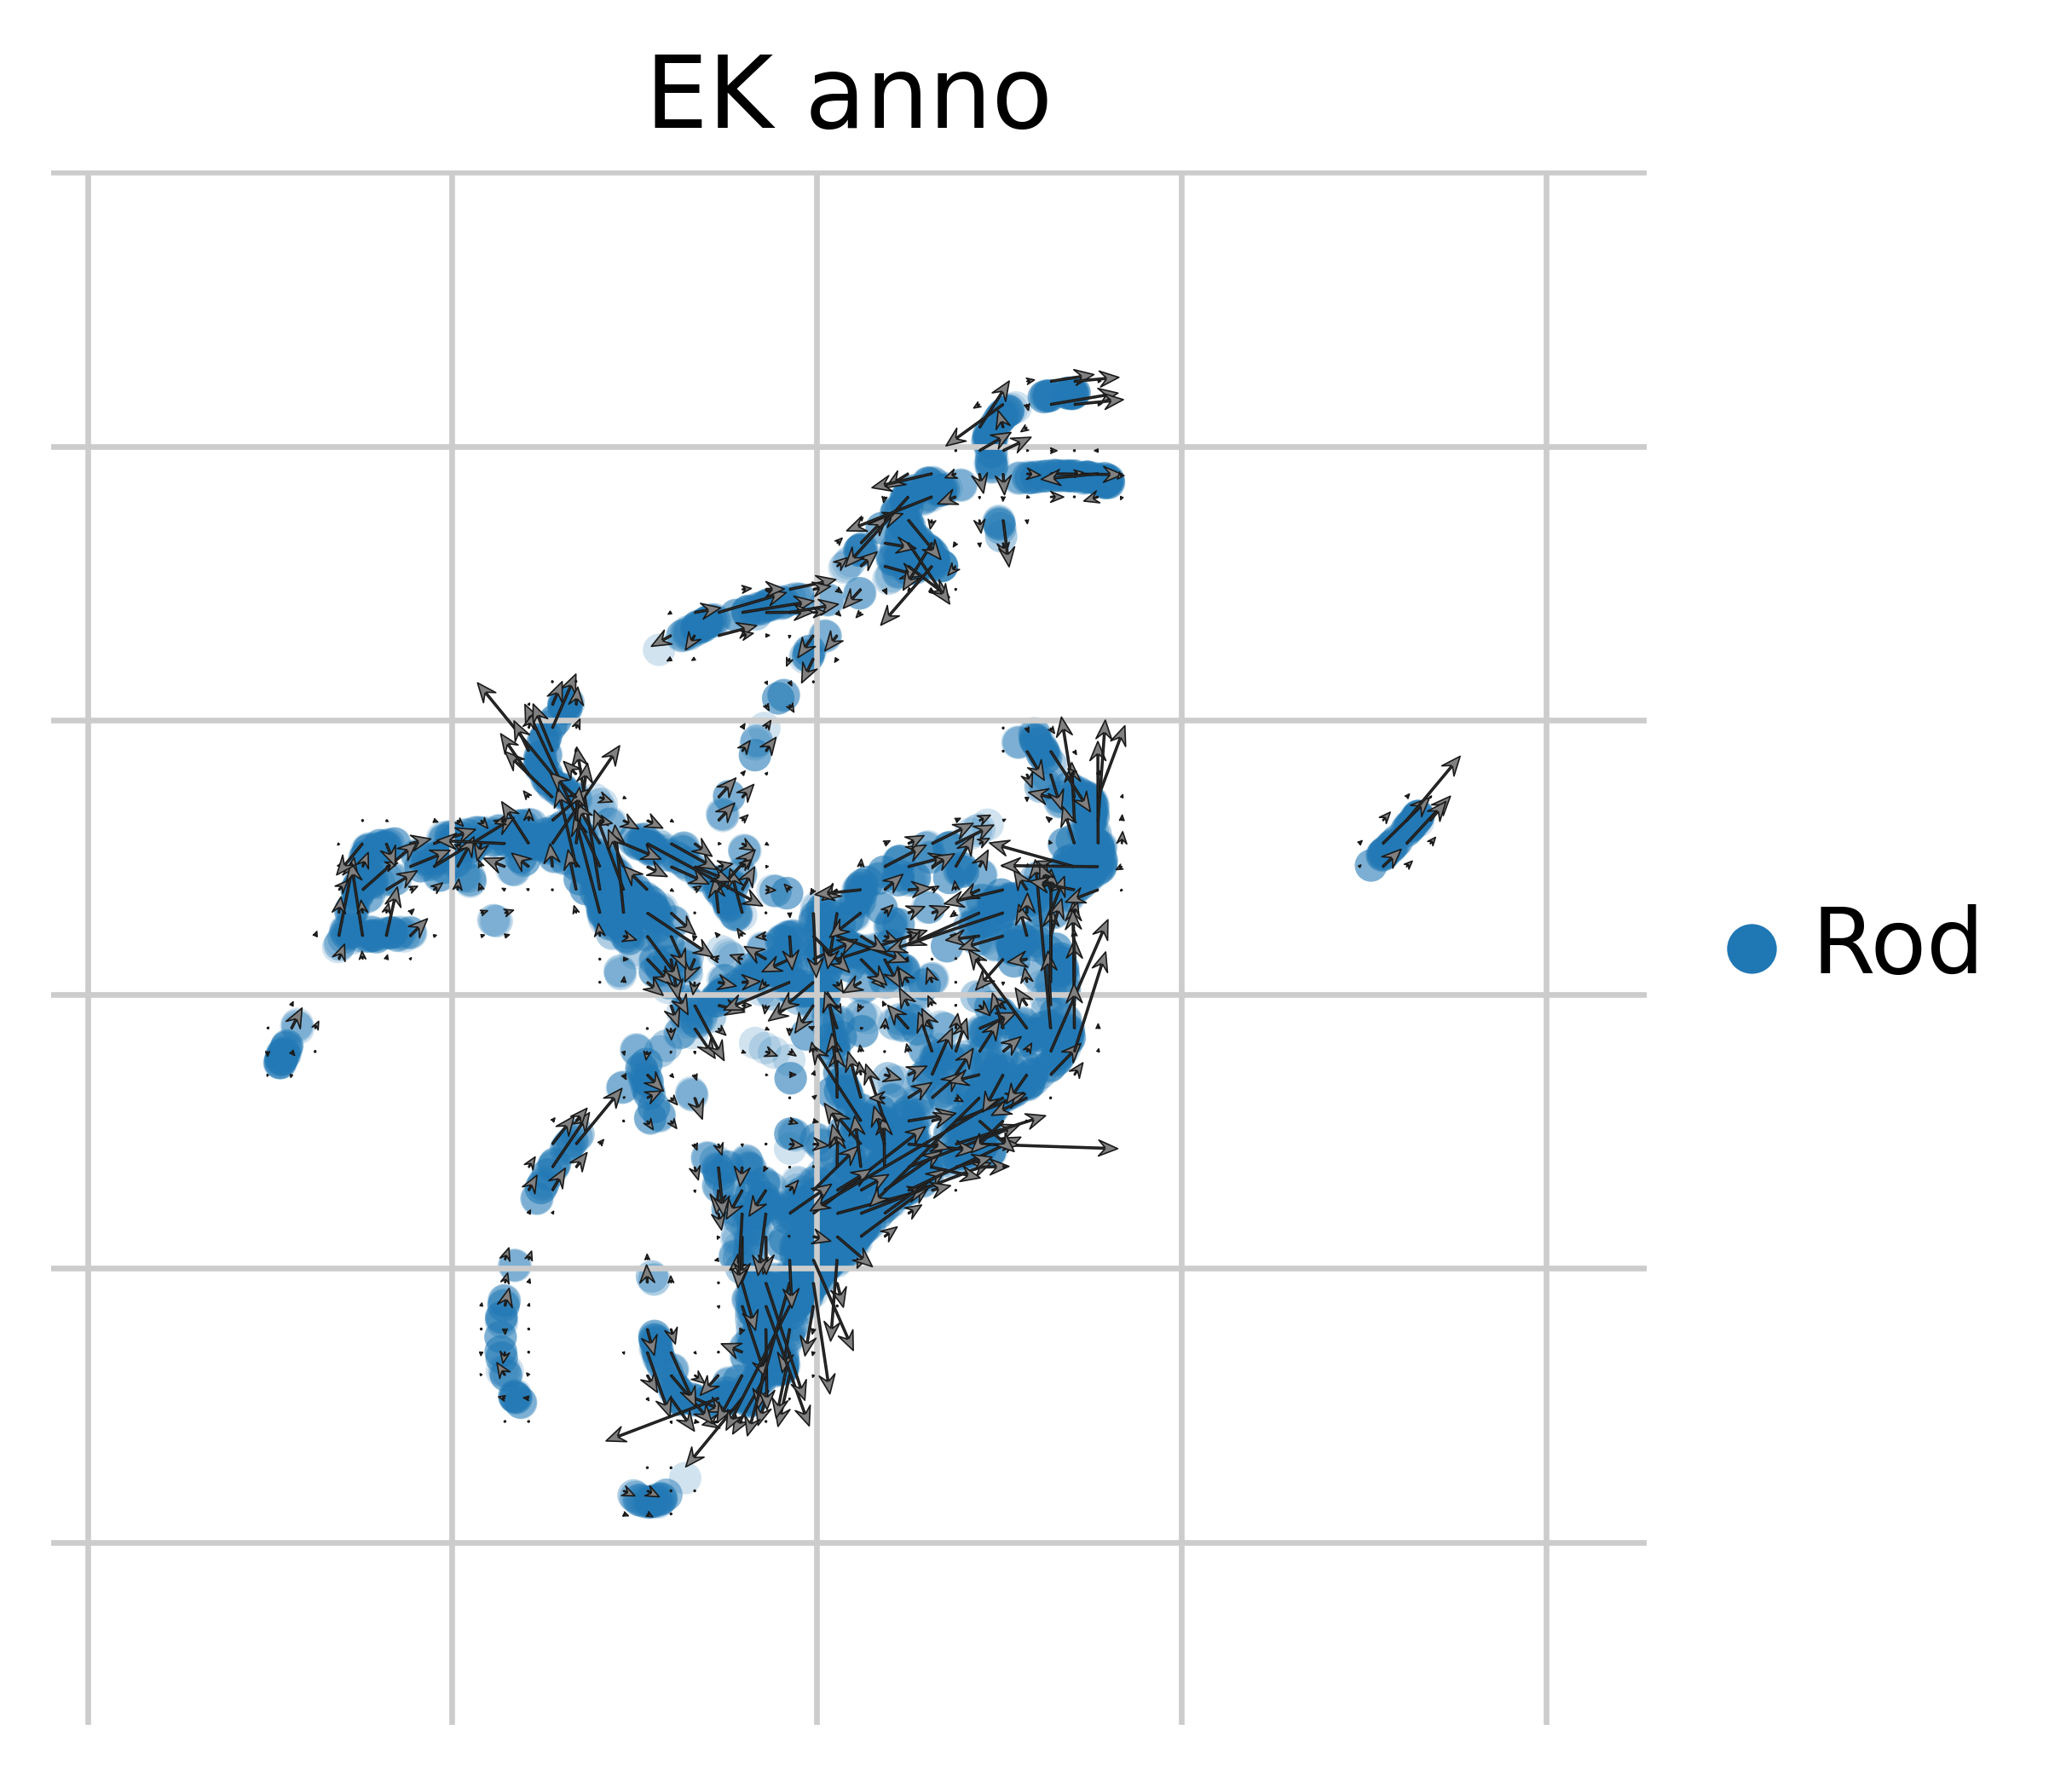

In [171]:
scv.pl.velocity_embedding_grid(adata_cult_pr, basis='draw_graph_fa', color = 'EK_anno', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 6, arrow_size = 2, density = 1, legend_loc= 'right')

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_draw_graph_fa', embedded velocity vectors (adata.obsm)


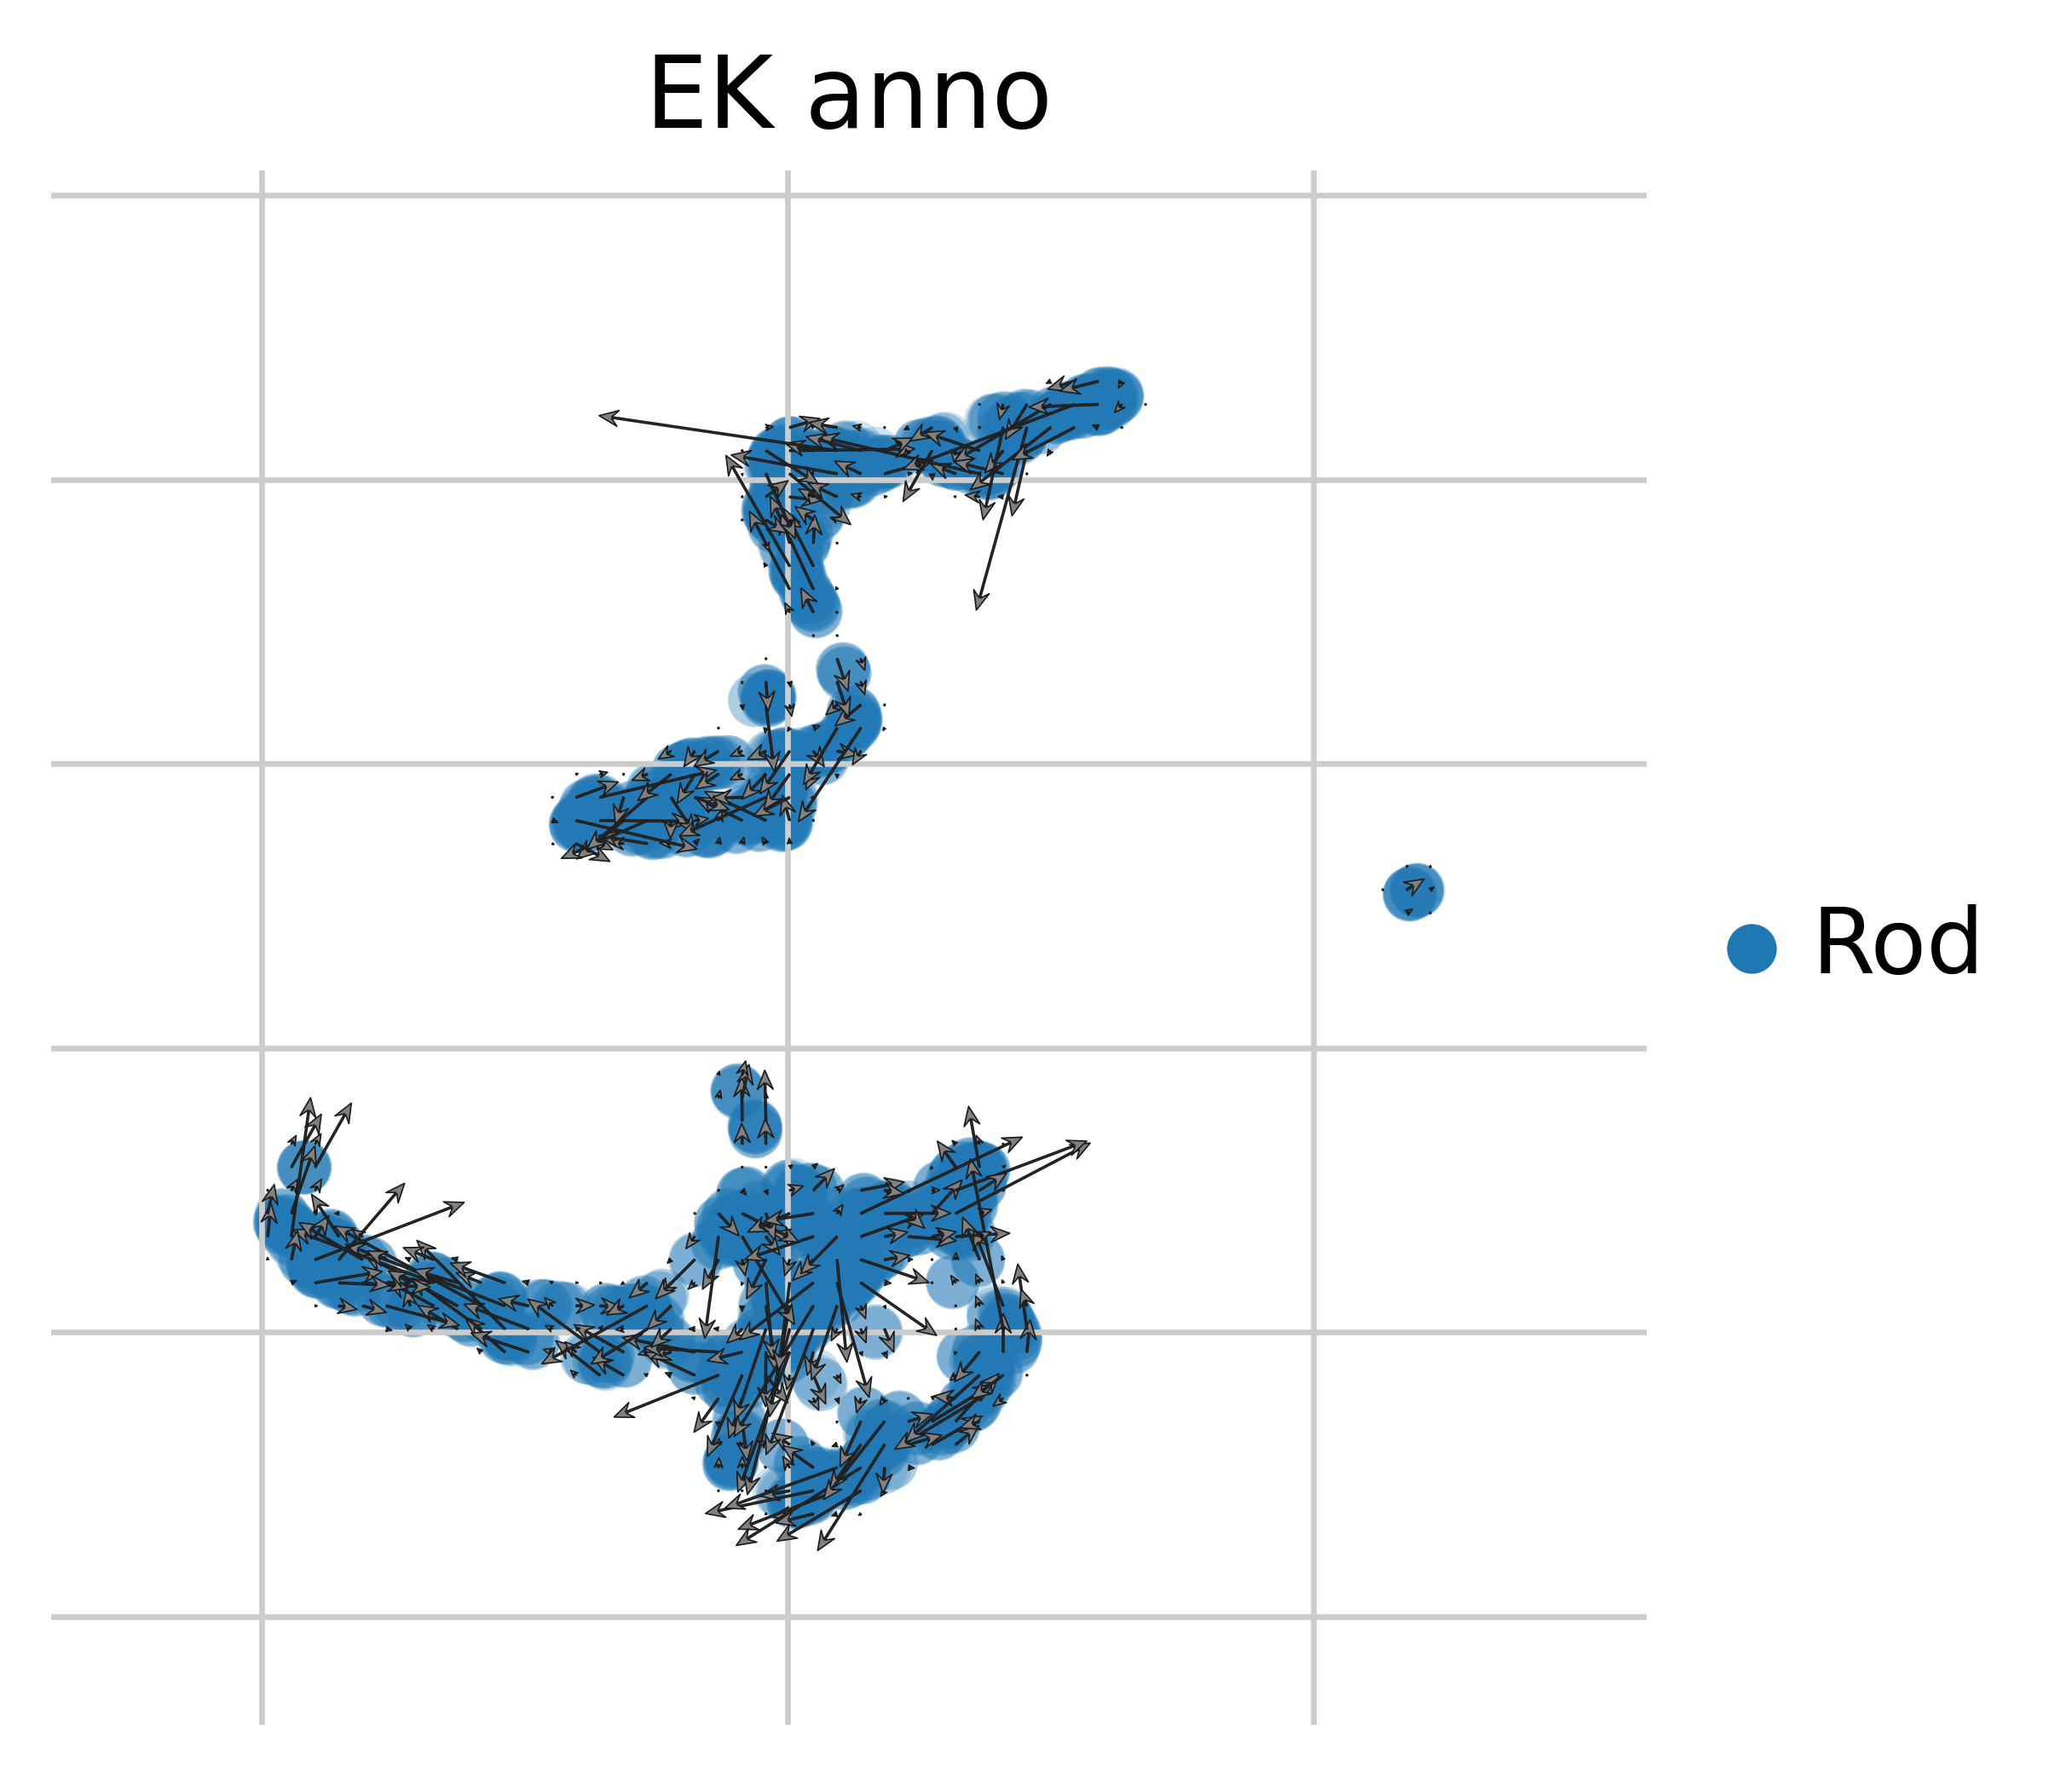

In [172]:
scv.pl.velocity_embedding_grid(adata_tran_pr, basis='draw_graph_fa', color = 'EK_anno', dpi = 300, add_margin = 0.2, figsize = (4,4), arrow_length = 6, arrow_size = 2, density = 1, legend_loc= 'right')

computing terminal states
    identified 4 regions of root cells and 7 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


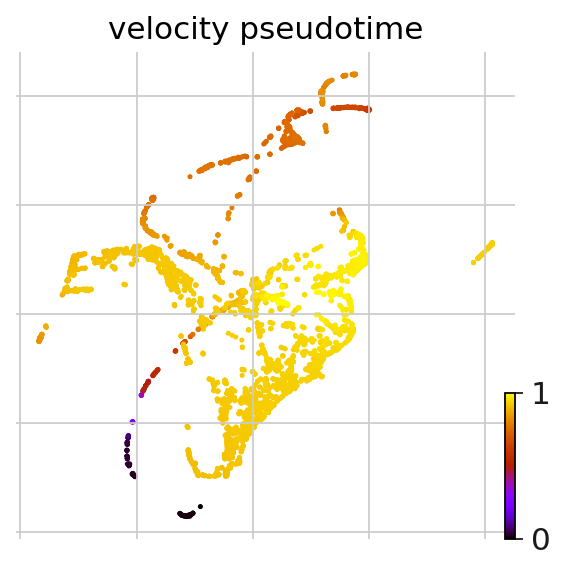

In [173]:
scv.tl.velocity_pseudotime(adata_cult_pr)
scv.pl.scatter(adata_cult_pr, color='velocity_pseudotime', cmap='gnuplot', basis='draw_graph_fa')

saving figure to file ./figures/scvelo_mandeep_transplant_pseudotime.pdf


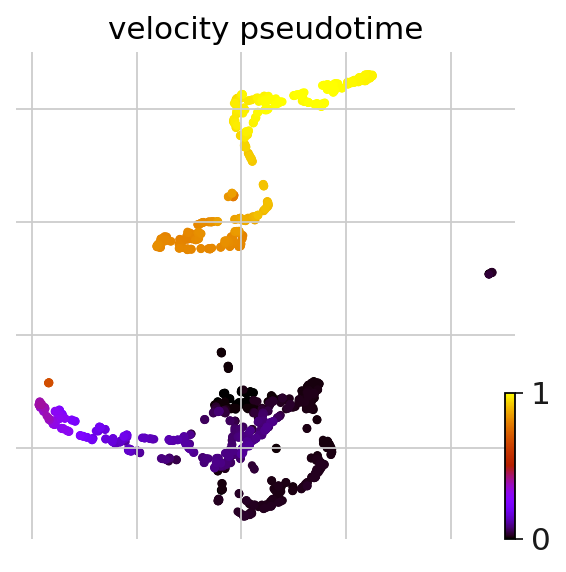

In [190]:
scv.tl.velocity_pseudotime(adata_tran_pr)
scv.pl.scatter(adata_tran_pr, color='velocity_pseudotime', cmap='gnuplot', basis='draw_graph_fa', save = 'mandeep_transplant_pseudotime.pdf')

computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)


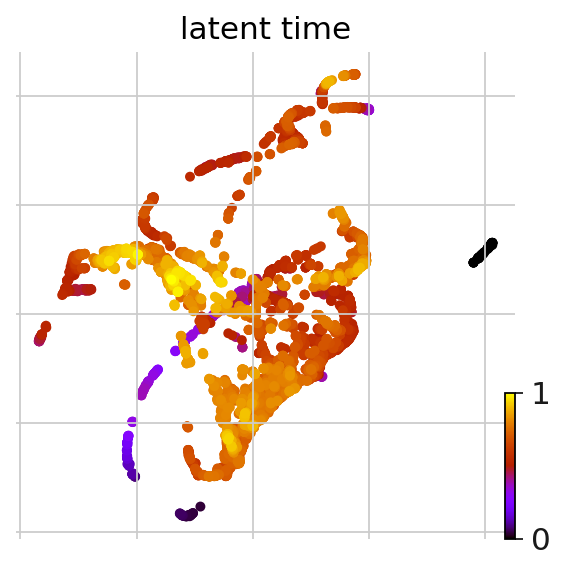

In [175]:
scv.tl.latent_time(adata_cult_pr)
scv.pl.scatter(adata_cult_pr, color='latent_time', color_map='gnuplot', size=80, basis = 'draw_graph_fa')

computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_mandeep_transpl_pseudotime.pdf


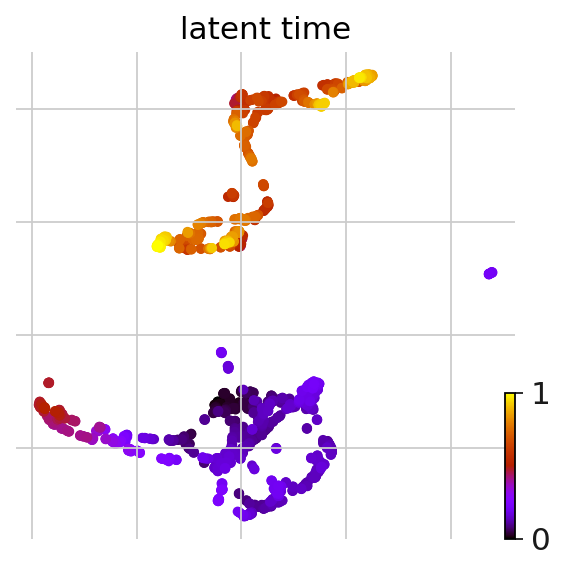

In [188]:
scv.tl.latent_time(adata_tran_pr)
scv.pl.scatter(adata_tran_pr, color='latent_time', color_map='gnuplot', size=80, basis = 'draw_graph_fa', save = 'mandeep_transpl_pseudotime.pdf')

saving figure to file ./figures/scvelo_heatmap_mandeep_transpl_heatmap.pdf


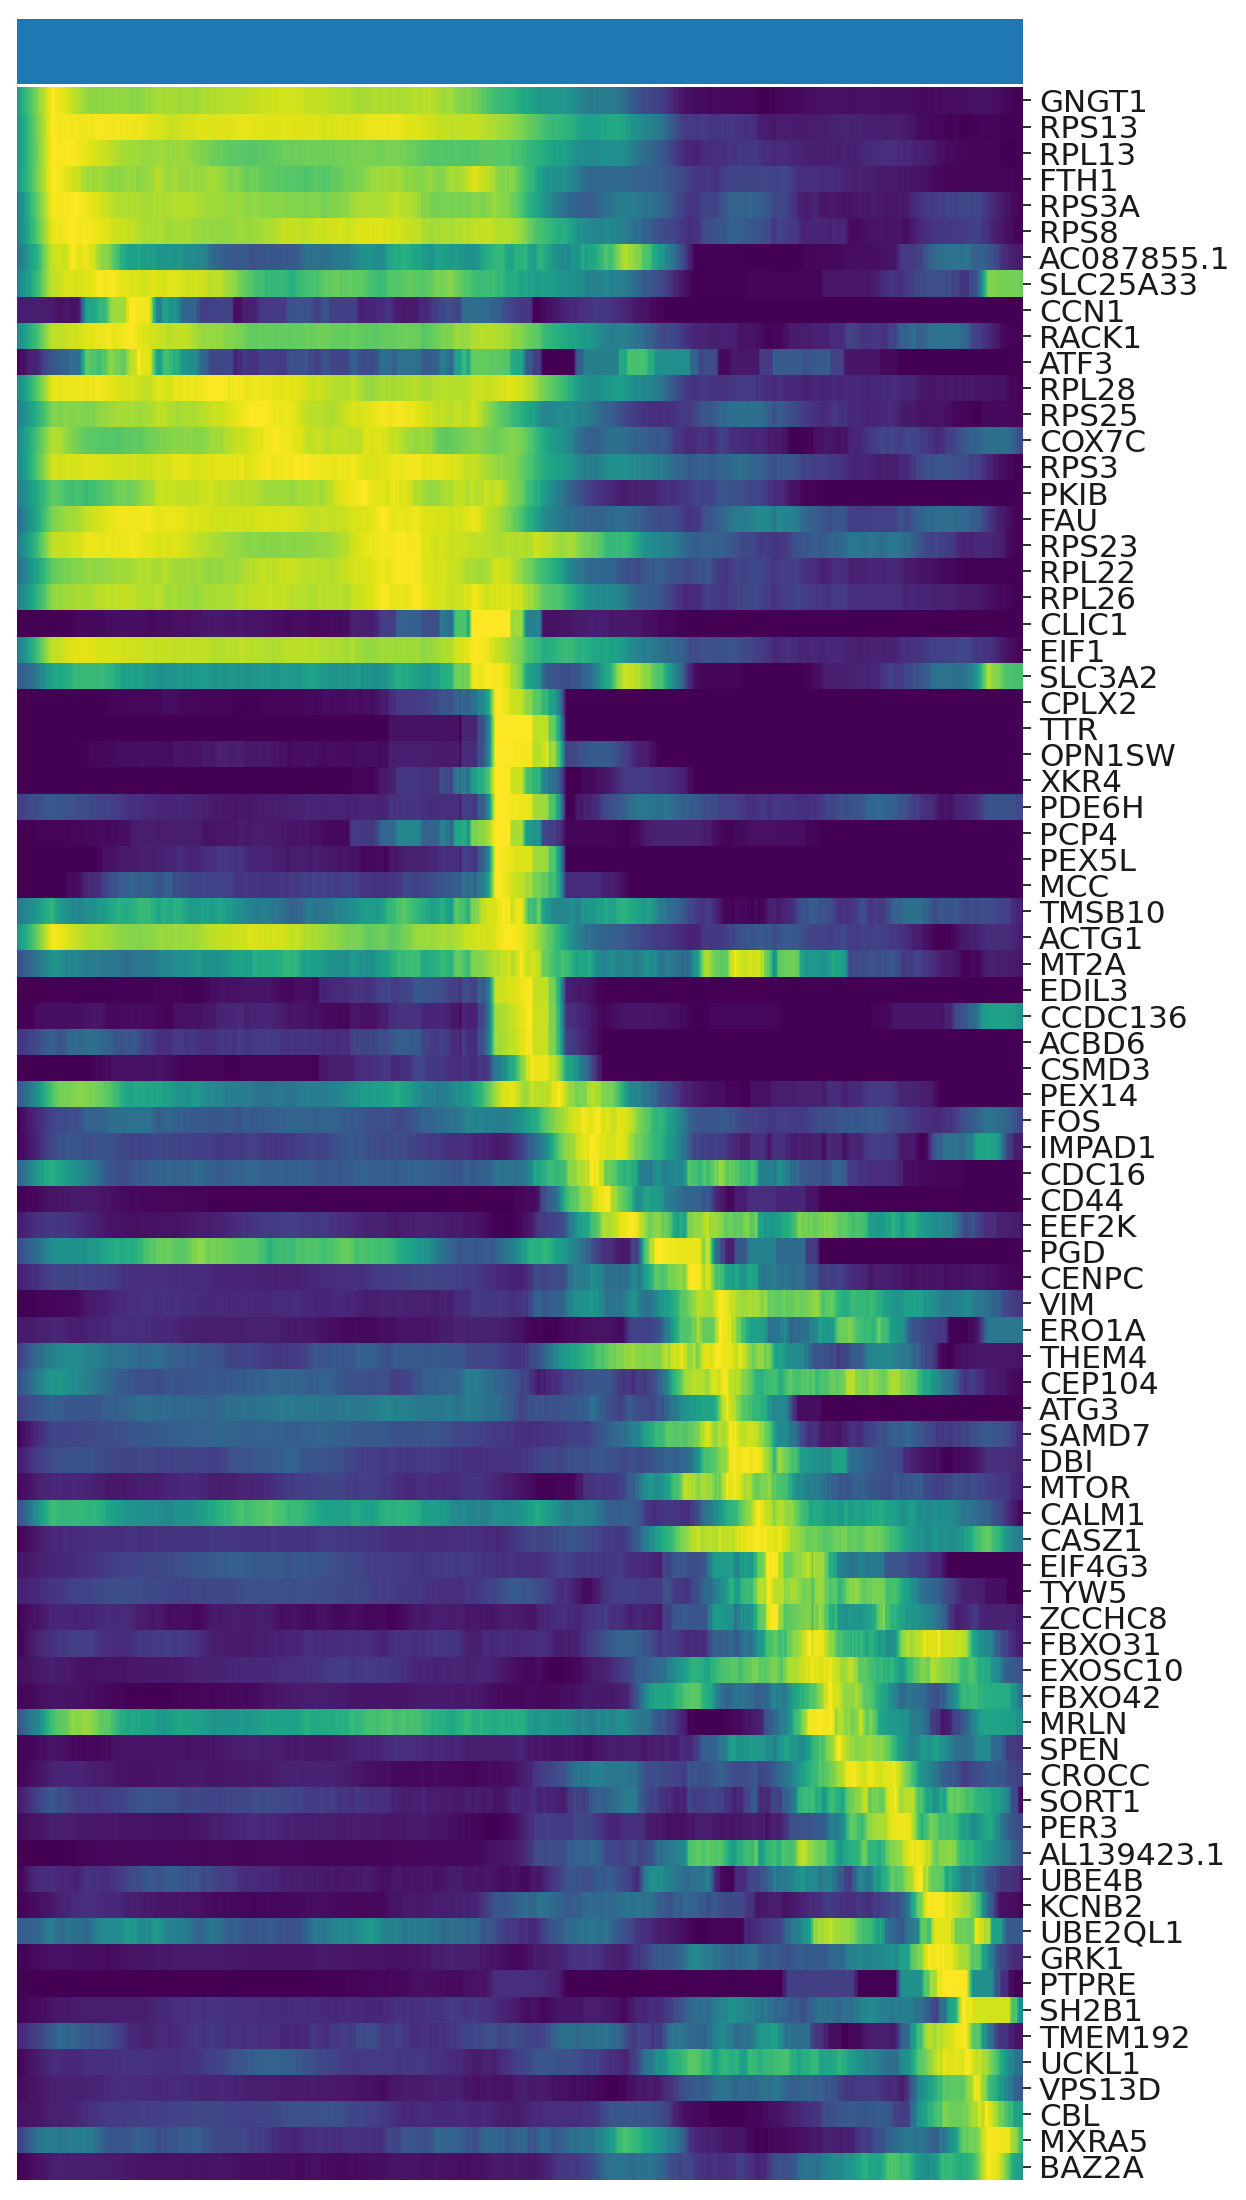

In [189]:
top_genes = adata_tran_pr.var['fit_likelihood'].sort_values(ascending=False).index[:80]
scv.pl.heatmap(adata_tran_pr, var_names=top_genes, sortby='latent_time', col_color='EK_anno', n_convolve=150,yticklabels=True, figsize = (8,14), save = 'mandeep_transpl_heatmap.pdf')

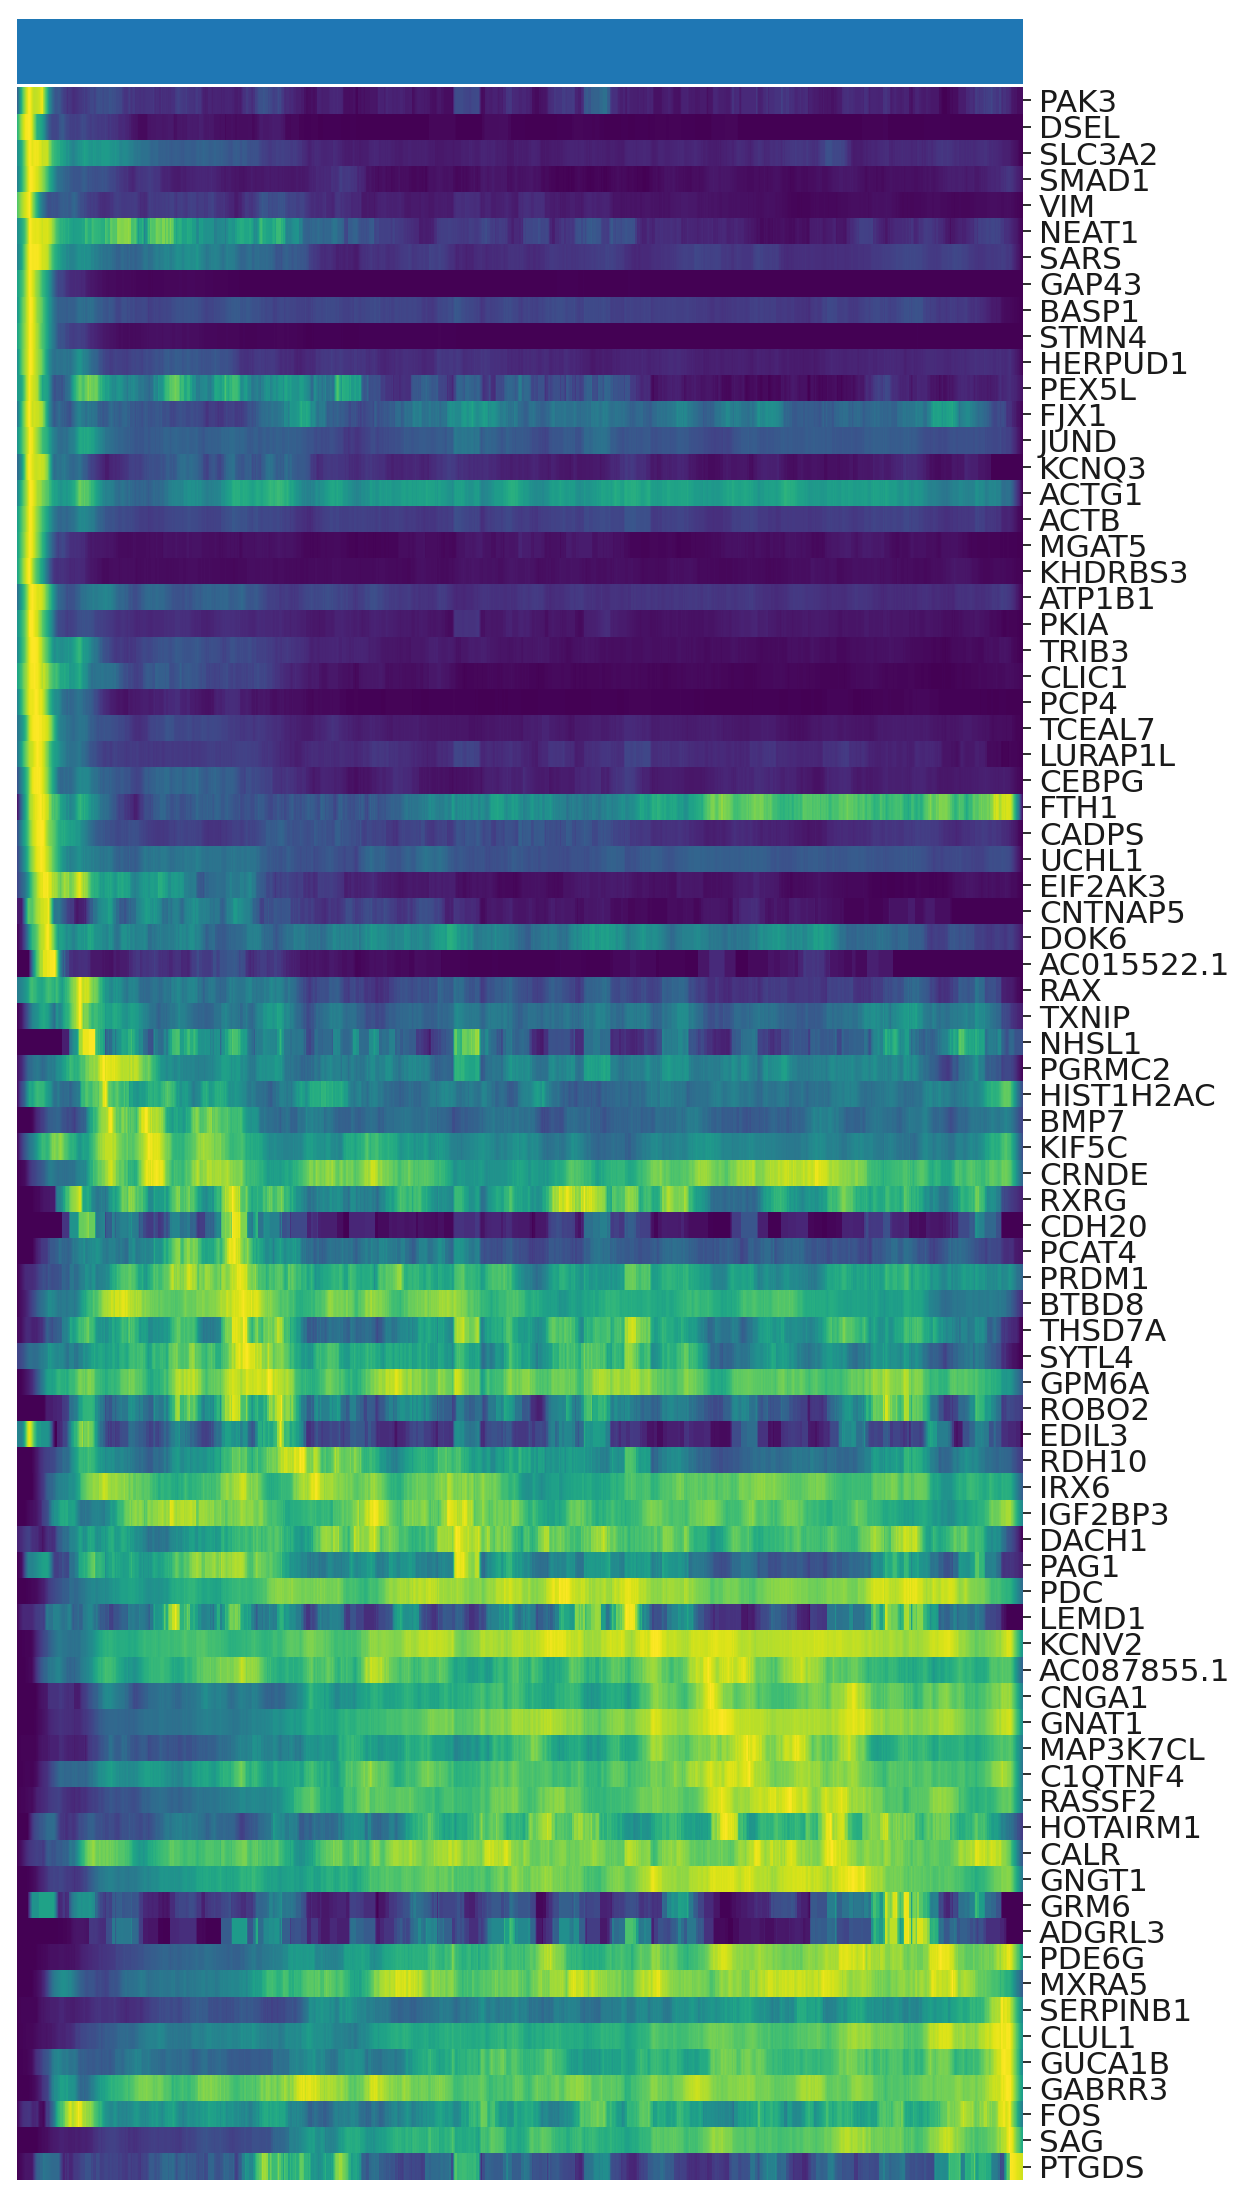

In [183]:
top_genes = adata_cult_pr.var['fit_likelihood'].sort_values(ascending=False).index[:80]
scv.pl.heatmap(adata_cult_pr, var_names=top_genes, sortby='latent_time', col_color='EK_anno', n_convolve=150,yticklabels=True, figsize = (8,14))